**Implementation of major Advanced Data Strutures using Python**

---
Created: August 2022

---

**Balanced Parentheses Tree**

In [1]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
def build_balanced_parentheses_tree(n):
    if n % 2 != 0:
        raise ValueError("Number of parentheses must be even to create a balanced tree")
    def generate_parentheses_combinations(prefix, open_count, close_count):
        if open_count == 0 and close_count == 0:
            return [prefix]
        combinations = []
        if open_count > 0:
            combinations += generate_parentheses_combinations(prefix + '(', open_count - 1, close_count)
        if close_count > open_count:
            combinations += generate_parentheses_combinations(prefix + ')', open_count, close_count - 1)
        return combinations
    parentheses_combinations = generate_parentheses_combinations('', n // 2, n // 2)
    def build_tree_from_string(parentheses_string):
        root = TreeNode(parentheses_string[0])
        current_node = root
        for char in parentheses_string[1:]:
            if char == '(':
                current_node.left = TreeNode(char)
                current_node = current_node.left
            elif char == ')':
                current_node.right = TreeNode(char)
                current_node = root
            else:
                raise ValueError("Invalid character in parentheses string")
        return root
    trees = [build_tree_from_string(combination) for combination in parentheses_combinations]
    return trees
def is_balanced(tree):
    def check_balance(node):
        if node is None:
            return 0
        left_height = check_balance(node.left)
        right_height = check_balance(node.right)
        if left_height == -1 or right_height == -1 or abs(left_height - right_height) > 1:
            return -1
        return max(left_height, right_height) + 1
    return check_balance(tree) != -1
def visualize_tree(node, level=0, prefix="Root: "):
    if node is not None:
        print(" " * (level * 4) + prefix + node.value)
        if node.left or node.right:
            visualize_tree(node.left, level + 1, "L--- ")
            visualize_tree(node.right, level + 1, "R--- ")
num_parentheses = 4
trees = build_balanced_parentheses_tree(num_parentheses)
for i, tree in enumerate(trees):
    print(f"Tree {i + 1}:")
    visualize_tree(tree)
    print("Balanced:", is_balanced(tree))
    print("\n")

Tree 1:
Root: (
    L--- (
        R--- )
    R--- )
Balanced: True


Tree 2:
Root: (
    L--- (
        R--- )
    R--- )
Balanced: True




**Binary Heap**

In [2]:
class BinaryHeap:
    def __init__(self):
        self.heap_list = [0]
    def is_empty(self):
        return len(self.heap_list) == 1
    def size(self):
        return len(self.heap_list) - 1
    def insert(self, value):
        self.heap_list.append(value)
        self._heapify_up()
    def pop(self):
        if self.is_empty():
            raise IndexError("Heap is empty")
        root = self.heap_list[1]
        last_element = self.heap_list.pop()
        if len(self.heap_list) > 1:
            self.heap_list[1] = last_element
            self._heapify_down()
        return root
    def _heapify_up(self):
        current_index = len(self.heap_list) - 1
        while current_index // 2 > 0:
            parent_index = current_index // 2
            if self.heap_list[current_index] < self.heap_list[parent_index]:
                self.heap_list[current_index], self.heap_list[parent_index] = (
                    self.heap_list[parent_index],
                    self.heap_list[current_index],
                )
            current_index = parent_index
    def _heapify_down(self):
        current_index = 1
        while current_index * 2 <= len(self.heap_list) - 1:
            min_child_index = self._find_min_child_index(current_index)
            if self.heap_list[current_index] > self.heap_list[min_child_index]:
                self.heap_list[current_index], self.heap_list[min_child_index] = (
                    self.heap_list[min_child_index],
                    self.heap_list[current_index],
                )
            current_index = min_child_index
    def _find_min_child_index(self, index):
        left_child_index = index * 2
        right_child_index = index * 2 + 1
        if right_child_index > len(self.heap_list) - 1:
            return left_child_index
        else:
            if self.heap_list[left_child_index] < self.heap_list[right_child_index]:
                return left_child_index
            else:
                return right_child_index
    def build_heap(self, values):
        self.heap_list = [0] + values[:]
        current_index = len(self.heap_list) // 2
        while current_index > 0:
            self._heapify_down_at_index(current_index)
            current_index -= 1
    def _heapify_down_at_index(self, index):
        while index * 2 <= len(self.heap_list) - 1:
            min_child_index = self._find_min_child_index(index)
            if self.heap_list[index] > self.heap_list[min_child_index]:
                self.heap_list[index], self.heap_list[min_child_index] = (
                    self.heap_list[min_child_index],
                    self.heap_list[index],
                )
            index = min_child_index
heap = BinaryHeap()
heap.insert(4)
heap.insert(8)
heap.insert(2)
heap.insert(5)
heap.insert(1)
print("Initial Heap:", heap.heap_list[1:])
print("Pop Min:", heap.pop())
print("Heap after Pop:", heap.heap_list[1:])
values_to_build_heap = [7, 3, 6, 10, 9, 11]
heap.build_heap(values_to_build_heap)
print("Heap after Build Heap:", heap.heap_list[1:])

Initial Heap: [1, 2, 4, 8, 5]
Pop Min: 1
Heap after Pop: [2, 5, 4, 8]
Heap after Build Heap: [3, 7, 6, 10, 9, 11]


**Binomial Heap**

In [8]:
class BinomialNode:
    def __init__(self, key):
        self.key = key
        self.degree = 0
        self.parent = None
        self.child = []
class BinomialHeap:
    def __init__(self):
        self.trees = []
    def is_empty(self):
        return not self.trees
    def _link(self, tree1, tree2):
        if tree1.key > tree2.key:
            tree1, tree2 = tree2, tree1
        tree2.parent = tree1
        tree1.child.append(tree2)
        tree1.degree += 1
        return tree1
    def _merge_trees(self, tree1, tree2):
        if tree1.key > tree2.key:
            tree1, tree2 = tree2, tree1
        tree2.parent = tree1
        tree1.child.append(tree2)
        tree1.degree += 1
        return tree1
    def insert(self, key):
        new_tree = BinomialNode(key)
        new_heap = BinomialHeap()
        new_heap.trees = [new_tree]
        self.union(new_heap)
    def union(self, other_heap):
        self.trees.extend(other_heap.trees)
        self.trees.sort(key=lambda x: x.degree)
        i = 0
        while i < len(self.trees) - 1:
            if (
                self.trees[i].degree == self.trees[i + 1].degree
                and (i + 2 == len(self.trees) or self.trees[i + 2].degree != self.trees[i].degree)
            ):
                self.trees[i] = self._link(self.trees[i], self.trees[i + 1])
                del self.trees[i + 1]
            i += 1
    def extract_min(self):
        if not self.trees:
            return None
        min_node = min(self.trees, key=lambda x: x.key)
        self.trees.remove(min_node)
        new_heap = BinomialHeap()
        new_heap.trees = min_node.child
        self.union(new_heap)
        return min_node.key
binomial_heap = BinomialHeap()
binomial_heap.insert(5)
binomial_heap.insert(3)
binomial_heap.insert(8)
binomial_heap.insert(1)
min_element = binomial_heap.extract_min()
print("Minimum Element:", min_element)
binomial_heap.insert(2)
binomial_heap.insert(7)
min_element = binomial_heap.extract_min()
print("Minimum Element:", min_element)

Minimum Element: 1
Minimum Element: 2


**Bipartite Graph**

In [9]:
from collections import defaultdict
class BipartiteGraph:
    def __init__(self):
        self.graph = defaultdict(list)
        self.color = {}
    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)
    def is_bipartite_util(self, node, current_color):
        self.color[node] = current_color
        for neighbor in self.graph[node]:
            if neighbor not in self.color:
                if not self.is_bipartite_util(neighbor, 1 - current_color):
                    return False
            elif self.color[neighbor] == current_color:
                return False
        return True
    def is_bipartite(self):
        self.color = {}
        for node in self.graph:
            if node not in self.color:
                if not self.is_bipartite_util(node, 0):
                    return False
        return True
bipartite_graph = BipartiteGraph()
bipartite_graph.add_edge(1, 2)
bipartite_graph.add_edge(2, 3)
bipartite_graph.add_edge(3, 4)
bipartite_graph.add_edge(4, 1)
if bipartite_graph.is_bipartite():
    print("The graph is bipartite.")
else:
    print("The graph is not bipartite.")

The graph is bipartite.


**Bloom Filter**

In [11]:
pip install mmh3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.1 MB/s eta 0:00:00


In [12]:
pip install bitarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 2.7 MB/s eta 0:00:00


In [13]:
import mmh3
from bitarray import bitarray
class BloomFilter:
    def __init__(self, size, num_hashes):
        self.size = size
        self.num_hashes = num_hashes
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
    def add(self, element):
        for seed in range(self.num_hashes):
            index = mmh3.hash(element, seed) % self.size
            self.bit_array[index] = 1
    def possibly_contains(self, element):
        for seed in range(self.num_hashes):
            index = mmh3.hash(element, seed) % self.size
            if not self.bit_array[index]:
                return False
        return True
bloom_filter = BloomFilter(size=100, num_hashes=3)
bloom_filter.add("apple")
bloom_filter.add("banana")
bloom_filter.add("orange")
print("Possibly contains 'apple':", bloom_filter.possibly_contains("apple"))
print("Possibly contains 'banana':", bloom_filter.possibly_contains("banana"))
print("Possibly contains 'grape':", bloom_filter.possibly_contains("grape"))

Possibly contains 'apple': True
Possibly contains 'banana': True
Possibly contains 'grape': False


**Burrows Wheeler Transform**

In [29]:
def burrows_wheeler_transform(text):
    rotations = [text[i:] + text[:i] for i in range(len(text))]
    sorted_rotations = sorted(rotations)
    bwt_result = ''.join(rotation[-1] for rotation in sorted_rotations)
    original_index = sorted_rotations.index(text)
    return bwt_result, original_index
def inverse_burrows_wheeler_transform(bwt_result, original_index):
    table = sorted([(char, i) for i, char in enumerate(bwt_result)])
    for i in range(len(bwt_result)-1):
        table = sorted(table, key=lambda x: x[0] + table[x[1]][0])
    original_text = [char for char, _ in table if char.endswith('\x01')]
    if original_index < len(original_text):
        return original_text[original_index].rstrip('\x01')
    else:
        return ""
input_text = "cheese pizza"
bwt_result, original_index = burrows_wheeler_transform(input_text)
inverse_result = inverse_burrows_wheeler_transform(bwt_result, original_index)
print("Input Text:", input_text)
print("Burrows-Wheeler Transform Result:", bwt_result)
print("Inverse Burrows-Wheeler Transform Result:", inverse_result)

Input Text: cheese pizza
Burrows-Wheeler Transform Result: ezashecp ezi
Inverse Burrows-Wheeler Transform Result: 


**Cayley Tree Enumeration**

In [30]:
pip install networkx

Number of labeled trees with 4 vertices: 5


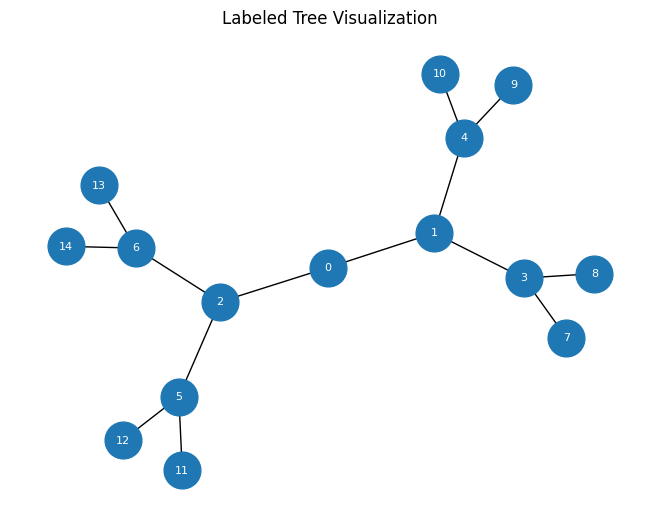

In [31]:
import math
import networkx as nx
import matplotlib.pyplot as plt
def cayley_tree_enumeration(n):
    if n == 1:
        return 1
    else:
        return math.factorial(2 * n - 2) // (math.factorial(n - 1) * math.factorial(n))
def generate_labeled_tree(n):
    graph = nx.balanced_tree(2, n-1)
    return graph
def visualize_tree(tree):
    pos = nx.spring_layout(tree)
    nx.draw(tree, pos, with_labels=True, node_size=700, font_size=8, font_color='white')
    plt.title("Labeled Tree Visualization")
    plt.show()
num_vertices = 4
num_labeled_trees = cayley_tree_enumeration(num_vertices)
print(f"Number of labeled trees with {num_vertices} vertices: {num_labeled_trees}")
labeled_tree = generate_labeled_tree(num_vertices)
visualize_tree(labeled_tree)

**Centered Interval Tree**

In [32]:
class CenteredIntervalTree:
    def __init__(self):
        self.root = None
    class Node:
        def __init__(self, start, end, max_end):
            self.start = start
            self.end = end
            self.max_end = max_end
            self.left = None
            self.right = None
    def insert(self, start, end):
        if not self.root:
            self.root = self.Node(start, end, end)
        else:
            self._insert(self.root, start, end)
    def _insert(self, node, start, end):
        node.max_end = max(node.max_end, end)
        if start < node.start:
            if node.left:
                self._insert(node.left, start, end)
            else:
                node.left = self.Node(start, end, end)
        else:
            if node.right:
                self._insert(node.right, start, end)
            else:
                node.right = self.Node(start, end, end)
    def search(self, start, end):
        return self._search(self.root, start, end)
    def _search(self, node, start, end):
        if not node or start > node.max_end or end < node.start:
            return None
        if start <= node.start and end >= node.end:
            return (node.start, node.end)
        left_result = self._search(node.left, start, end)
        right_result = self._search(node.right, start, end)
        if left_result:
            return left_result
        elif right_result:
            return right_result
        else:
            return None
cit = CenteredIntervalTree()
cit.insert(10, 20)
cit.insert(5, 15)
cit.insert(25, 30)
cit.insert(40, 50)
result = cit.search(12, 28)
print("Intervals overlapping with [12, 28]:", result)

Intervals overlapping with [12, 28]: None


**Chordal Graph Recognition**

In [36]:
import networkx as nx
from networkx.algorithms.clique import find_cliques
def is_chordal(graph):
    def is_perfect_elimination_ordering(ordering, graph):
        eliminated = set()
        for vertex in ordering:
            neighbors = set(graph.neighbors(vertex))
            neighbors.difference_update(eliminated)
            if any(neighborhood not in cliques for neighborhood in find_cliques(graph.subgraph(neighbors))):
                return False
            eliminated.add(vertex)
        return True
    def lex_bfs(graph):
        ordering = []
        visited = set()
        def dfs(v):
            visited.add(v)
            ordering.append(v)
            neighbors = sorted(set(graph.neighbors(v)) - visited, key=lambda u: (len(set(graph.neighbors(u))), u))
            for u in neighbors:
                dfs(u)
        for vertex in sorted(graph.nodes, key=lambda v: (len(set(graph.neighbors(v))), v), reverse=True):
            if vertex not in visited:
                dfs(vertex)
        return ordering[::-1]
    cliques = [set(clique) for clique in find_cliques(graph)]
    ordering = lex_bfs(graph)
    return is_perfect_elimination_ordering(ordering, graph)
g = nx.Graph()
g.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)])
if is_chordal(g):
    print("The graph is chordal.")
else:
    print("The graph is not chordal.")

The graph is not chordal.


**Concave Hull**

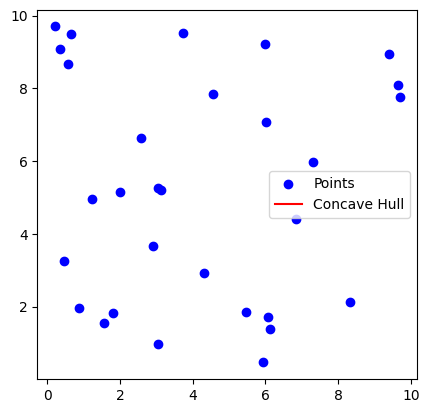

In [40]:
import numpy as np
from scipy.spatial import Delaunay
from shapely.geometry import Polygon, Point
def alpha_shape(points, alpha):
    tri = Delaunay(points)
    edges = set()
    for simplex in tri.simplices:
        edges.update([(simplex[i], simplex[j]) for i in range(3) for j in range(i+1, 3)])
    def add_edge(edge, edges, edge_points):
        edges.add(edge)
        if edge[0] not in edge_points:
            edge_points[edge[0]] = set()
        if edge[1] not in edge_points:
            edge_points[edge[1]] = set()
        edge_points[edge[0]].add(edge[1])
        edge_points[edge[1]].add(edge[0])
    edge_points = dict()
    for edge in edges:
        if all(edge[0] != edge[1] for edge in edges):
            add_edge(edge, edges, edge_points)
    polygons = []
    while edges:
        edge = min(edges, key=lambda e: np.linalg.norm(points[e[0]] - points[e[1]]))
        edges.discard(edge)
        edge_group = [edge]
        while edge_group:
            current_edge = edge_group.pop()
            new_edges = set(edge_points[current_edge[0]]) & edges
            edge_group += [edge for edge in new_edges]
            edges -= new_edges
        polygon_points = set(point for edge in edge_group for point in edge)
        polygon = Polygon([points[i] for i in polygon_points])
        if polygon.is_empty or not polygon.is_simple:
            continue
        if polygon.exterior.is_ccw:
            polygons.append(polygon)
    concave_hull = polygons[0] if polygons else Polygon()
    for poly in polygons[1:]:
        concave_hull = concave_hull.union(poly)
    return concave_hull.simplify(alpha)
np.random.seed(42)
points = np.random.rand(30, 2) * 10
concave_hull = alpha_shape(points, alpha=0.2)
import matplotlib.pyplot as plt
plt.scatter(points[:, 0], points[:, 1], c='blue', marker='o', label='Points')
x, y = concave_hull.exterior.xy
plt.plot(x, y, c='red', label='Concave Hull')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

**Convex Hull**

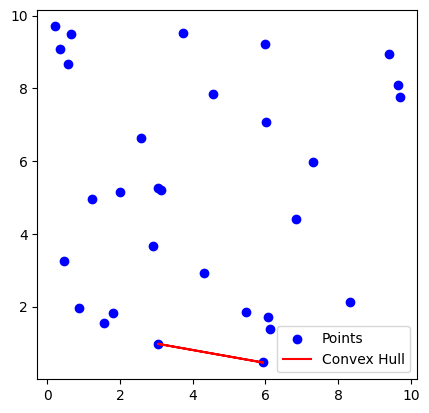

In [41]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
def graham_scan(points):
    anchor = min(range(len(points)), key=lambda i: (points[i, 1], points[i, 0]))
    anchor_point = points[anchor]
    sorted_points = sorted(range(len(points)), key=lambda i: (
        np.arctan2(points[i, 1] - anchor_point[1], points[i, 0] - anchor_point[0]),
        np.linalg.norm(points[i] - anchor_point)
    ))
    convex_hull = [anchor, sorted_points[0], sorted_points[1]]
    for i in sorted_points[2:]:
        while len(convex_hull) > 1 and np.cross(
            points[i] - points[convex_hull[-2]],
            points[convex_hull[-1]] - points[convex_hull[-2]]
        ) < 0:
            convex_hull.pop()
        convex_hull.append(i)
    return np.array([points[i] for i in convex_hull])
np.random.seed(42)
points = np.random.rand(30, 2) * 10
convex_hull = graham_scan(points)
plt.scatter(points[:, 0], points[:, 1], c='blue', marker='o', label='Points')
plt.plot(np.append(convex_hull[:, 0], convex_hull[0, 0]),
         np.append(convex_hull[:, 1], convex_hull[0, 1]),
         c='red', label='Convex Hull')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

**Count Min Sketch**

In [44]:
import numpy as np
import mmh3
class CountMinSketch:
    def __init__(self, width, depth):
        self.width = width
        self.depth = depth
        self.count_matrix = np.zeros((depth, width), dtype=int)
        self.hash_functions = [lambda x, i=i: mmh3.hash(str(x) + str(i)) % width for i in range(depth)]
    def update(self, item, count=1):
        for i in range(self.depth):
            hash_value = self.hash_functions[i](item)
            self.count_matrix[i, hash_value] += count
    def query(self, item):
        min_count = float('inf')
        for i in range(self.depth):
            hash_value = self.hash_functions[i](item)
            min_count = min(min_count, self.count_matrix[i, hash_value])
        return min_count
def simulate_stream(items, sketch):
    for item in items:
        count = np.random.poisson(5)  # Simulating random counts for items
        sketch.update(item, count)
items = ['PIZZA', 'BURGER', 'COFFEE', 'OATMEAL', 'BURGER', 'OATMEAL', 'PIZZA', 'OATMEAL', 'BURGER', 'PIZZA']
width = 100
depth = 5
cms = CountMinSketch(width, depth)
simulate_stream(items, cms)
for item in set(items):
    estimated_count = cms.query(item)
    print(f"Estimated count for {item}: {estimated_count}")

Estimated count for COFFEE: 8
Estimated count for OATMEAL: 19
Estimated count for BURGER: 12
Estimated count for PIZZA: 16


**D-Heap**

In [45]:
class DHeap:
    def __init__(self, d):
        self.d = d
        self.heap = []
    def insert(self, key):
        self.heap.append(key)
        self.heapify_up(len(self.heap) - 1)
    def extract_min(self):
        if not self.heap:
            return None
        if len(self.heap) == 1:
            return self.heap.pop()
        min_val = self.heap[0]
        self.heap[0] = self.heap.pop()
        self.heapify_down(0)
        return min_val
    def heapify_up(self, index):
        parent = (index - 1) // self.d
        while index > 0 and self.heap[index] < self.heap[parent]:
            self.heap[index], self.heap[parent] = self.heap[parent], self.heap[index]
            index = parent
            parent = (index - 1) // self.d
    def heapify_down(self, index):
        smallest = index
        for i in range(1, self.d + 1):
            child = self.d * index + i
            if child < len(self.heap) and self.heap[child] < self.heap[smallest]:
                smallest = child
        if smallest != index:
            self.heap[index], self.heap[smallest] = self.heap[smallest], self.heap[index]
            self.heapify_down(smallest)
    def peek_min(self):
        return None if not self.heap else self.heap[0]
d = 3
d_heap = DHeap(d)
elements = [4, 2, 8, 5, 1, 7, 3, 6]
for element in elements:
    d_heap.insert(element)
while d_heap.peek_min() is not None:
    print(d_heap.extract_min())

1
2
3
4
5
6
7
8


**Directed Acyclic Word Graph**

In [81]:
class DAWGNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_word = False
class DAWG:
    def __init__(self):
        self.root = DAWGNode()
    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = DAWGNode()
            node = node.children[char]
        node.is_end_of_word = True
    def compact(self):
        stack = [self.root]
        while stack:
            current_node = stack.pop()
            children_to_remove = []
            for char, child_node in current_node.children.items():
                stack.append(child_node)
                if not child_node.children:
                    children_to_remove.append(char)
            for char in children_to_remove:
                del current_node.children[char]
    def search(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.is_end_of_word
    def display(self):
        self.__display_recursive(self.root, '')
    def __display_recursive(self, node, prefix):
        if node.is_end_of_word:
            print(prefix)
        for char, child in node.children.items():
            self.__display_recursive(child, prefix + char)
dawg = DAWG()
words = ["apple", "app", "apricot", "banana", "bat", "batman"]
for word in words:
    dawg.insert(word)
dawg.compact()
dawg.display()
print("Search Results:")
search_words = ["apple", "app", "apricot", "banana", "bat", "batman", "orange"]
for word in search_words:
    result = "Found" if dawg.search(word) else "Not Found"
    print(f"{word}: {result}")

app
bat
Search Results:
apple: Not Found
app: Found
apricot: Not Found
banana: Not Found
bat: Found
batman: Not Found
orange: Not Found


**Doubly Connected Edge List**

In [84]:
class Vertex:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.incident_edge = None
class HalfEdge:
    def __init__(self):
        self.origin = None
        self.twin = None
        self.next = None
        self.prev = None
        self.incident_face = None
class Face:
    def __init__(self):
        self.incident_edge = None
class DCEL:
    def __init__(self):
        self.vertices = []
        self.half_edges = []
        self.faces = []
    def add_vertex(self, x, y):
        vertex = Vertex(x, y)
        self.vertices.append(vertex)
        return vertex
    def add_half_edge(self, origin, twin=None, next_edge=None, prev_edge=None, incident_face=None):
        half_edge = HalfEdge()
        half_edge.origin = origin
        half_edge.twin = twin
        half_edge.next = next_edge
        half_edge.prev = prev_edge
        half_edge.incident_face = incident_face
        self.half_edges.append(half_edge)
        return half_edge
    def add_face(self, incident_edge=None):
        face = Face()
        face.incident_edge = incident_edge
        self.faces.append(face)
        return face
    def display_dcel(self):
        print("Vertices:")
        for vertex in self.vertices:
            print(f"({vertex.x}, {vertex.y})")
        print("\nHalf-Edges:")
        for half_edge in self.half_edges:
            print(f"Origin: ({half_edge.origin.x}, {half_edge.origin.y})")
        print("\nFaces:")
        for face in self.faces:
            print("Face")
dcel = DCEL()
v1 = dcel.add_vertex(0, 0)
v2 = dcel.add_vertex(1, 0)
v3 = dcel.add_vertex(1, 1)
he1 = dcel.add_half_edge(v1)
he2 = dcel.add_half_edge(v2)
he3 = dcel.add_half_edge(v3)
he1.twin = he2
he2.twin = he1
he2.next = he3
he3.prev = he2
face = dcel.add_face(he1)
dcel.display_dcel()

Vertices:
(0, 0)
(1, 0)
(1, 1)

Half-Edges:
Origin: (0, 0)
Origin: (1, 0)
Origin: (1, 1)

Faces:
Face


**Dynamic Link Cut Tree**

In [85]:
pip install matplotlib networkx

Values in the path after expose:
5 

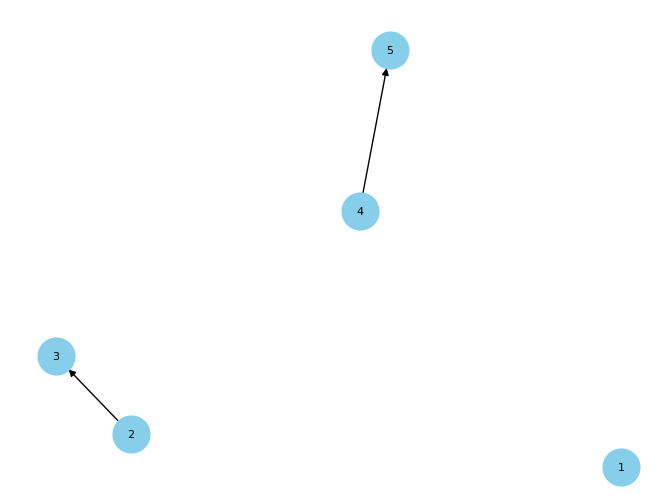

In [93]:
import networkx as nx
import matplotlib.pyplot as plt
class Node:
    def __init__(self, key):
        self.key = key
        self.parent = None
        self.left = None
        self.right = None
        self.size = 1
        self.value = 0
class DynamicLinkCutTree:
    def __init__(self):
        self.G = nx.DiGraph()
        self.nodes = {}
    def make_tree(self, key, value):
        if key not in self.nodes:
            node = Node(key)
            node.value = value
            self.nodes[key] = node
            self.G.add_node(key, value=value)
            return node
        return self.nodes[key]
    def link(self, u, v):
        if u is None or v is None:
            return
        self.cut(u)
        u.parent = v
        self.G.add_edge(v.key, u.key)
    def cut(self, u):
        if u is None or u.parent is None:
            return
        v = u.parent
        u.parent = None
        self.G.remove_edge(v.key, u.key)
    def expose(self, u):
        last = None
        while u is not None:
            self.splay(u)
            u.right = last
            last = u
            u = u.parent
        return last
    def splay(self, x):
        while x.parent is not None:
            p = x.parent
            g = p.parent
            if g is None:
                self.rotate(x)
            elif (x == p.left) == (p == g.left):
                self.rotate(p)
                self.rotate(x)
            else:
                self.rotate(x)
                self.rotate(x)
    def rotate(self, x):
        p = x.parent
        g = p.parent
        if p.left == x:
            y = x.right
            x.right = p
            p.left = y
        else:
            y = x.left
            x.left = p
            p.right = y
        if y is not None:
            y.parent = p
        x.parent = g
        if g is not None:
            if g.left == p:
                g.left = x
            else:
                g.right = x
        self.update(p)
    def update(self, x):
        x.size = 1 + (x.left.size if x.left is not None else 0) + (x.right.size if x.right is not None else 0)
def visualize(tree):
    pos = nx.spring_layout(tree.G)
    nx.draw(tree.G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black")
    plt.show()
def main():
    tree = DynamicLinkCutTree()
    nodes = [tree.make_tree(i, i) for i in range(1, 6)]
    tree.link(nodes[2], nodes[1])
    tree.link(nodes[3], nodes[2])
    tree.link(nodes[4], nodes[3])
    tree.cut(nodes[3])
    last = tree.expose(nodes[4])
    print("Values in the path after expose:")
    while last is not None:
        print(last.value, end=" ")
        last = last.right
    visualize(tree)
if __name__ == "__main__":
    main()

**Dynamic Perfect Hashing**

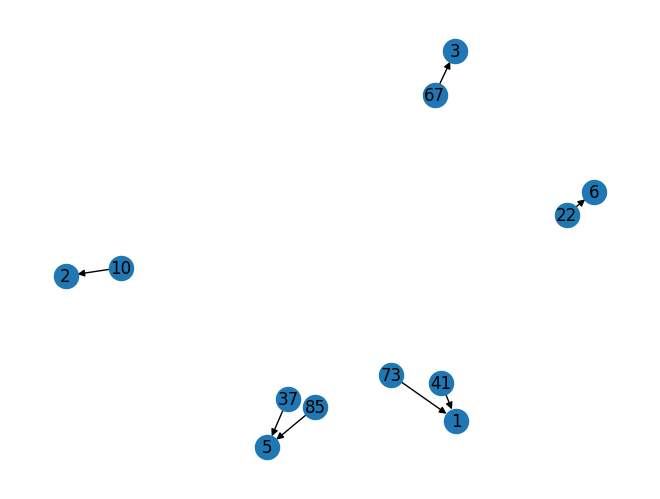

In [118]:
import matplotlib.pyplot as plt
import networkx as nx
class DynamicHashing:
    def __init__(self, size=2):
        self.size = size
        self.bucket_count = 2
        self.buckets = [[] for _ in range(self.bucket_count)]
        self.level = 0
    def insert(self, key):
        index = key % self.size
        bucket = self.buckets[index]
        if len(bucket) < self.bucket_count:
            bucket.append(key)
        else:
            self.resize_table()
    def resize_table(self):
        self.bucket_count *= 2
        self.size *= 2
        new_buckets = [[] for _ in range(self.bucket_count)]
        for bucket in self.buckets:
            for key in bucket:
                index = key % self.size
                new_buckets[index].append(key)
        self.buckets = new_buckets
        self.level += 1
    def visualize(self):
        G = nx.DiGraph()
        for i, bucket in enumerate(self.buckets):
            for key in bucket:
                G.add_node(key)
                G.add_edge(key, i)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True)
        plt.show()
def main():
    dynamic_hashing = DynamicHashing()
    keys_to_insert = [10, 22, 37, 41, 52, 67, 73, 85, 97]
    for key in keys_to_insert:
        dynamic_hashing.insert(key)
    dynamic_hashing.visualize()
if __name__ == "__main__":
    main()

**Dynamic Range Median Query**

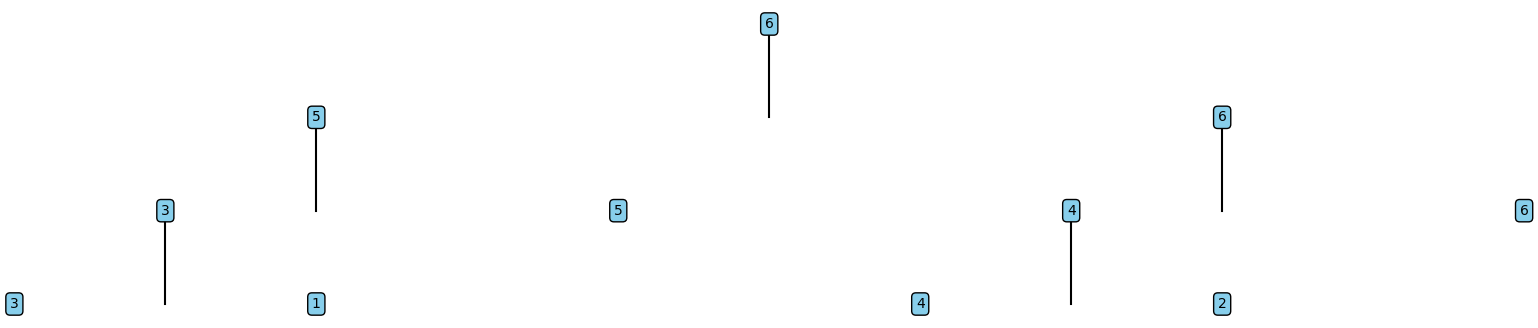

The number of elements less than or equal to 4 in the range [1, 4] = 3


In [122]:
import matplotlib.pyplot as plt
class SegmentTree:
    def __init__(self, arr):
        self.n = len(arr)
        self.tree_size = 2 * (2 ** (self._calculate_depth(1, 0, self.n - 1) + 1))
        self.tree = [float('inf')] * self.tree_size
        self._build_tree(arr, 1, 0, self.n - 1)
    def _build_tree(self, arr, node, start, end):
        if start == end:
            self.tree[node] = arr[start]
        else:
            mid = (start + end) // 2
            self._build_tree(arr, 2 * node, start, mid)
            self._build_tree(arr, 2 * node + 1, mid + 1, end)
            self.tree[node] = max(self.tree[2 * node], self.tree[2 * node + 1])
    def dynamic_median_query(self, left, right, k):
        return self._dynamic_median_query(1, 0, self.n - 1, left, right, k)
    def _dynamic_median_query(self, node, start, end, left, right, k):
        if start == end:
            return 1 if self.tree[node] <= k else 0
        mid = (start + end) // 2
        if right <= mid:
            return self._dynamic_median_query(2 * node, start, mid, left, right, k)
        elif left > mid:
            return self._dynamic_median_query(2 * node + 1, mid + 1, end, left, right, k)
        else:
            left_count = self._dynamic_median_query(2 * node, start, mid, left, mid, k)
            right_count = self._dynamic_median_query(2 * node + 1, mid + 1, end, mid + 1, right, k)
            return left_count + right_count
    def plot_segment_tree(self):
        tree_depth = self._calculate_depth(1, 0, self.n - 1)
        nodes_at_depth = [2 ** i for i in range(tree_depth + 1)]
        total_nodes = sum(nodes_at_depth)
        fig, ax = plt.subplots(figsize=(total_nodes, tree_depth + 1))
        self._plot_node(ax, 1, 0, self.n - 1, 0, tree_depth)
        ax.axis('off')
        plt.show()
    def _calculate_depth(self, node, start, end):
        if start == end:
            return 0
        mid = (start + end) // 2
        left_depth = self._calculate_depth(2 * node, start, mid)
        right_depth = self._calculate_depth(2 * node + 1, mid + 1, end)
        return max(left_depth, right_depth) + 1
    def _plot_node(self, ax, node, start, end, depth, max_depth):
        if start == end:
            ax.text((start + end) / 2, max_depth - depth, str(self.tree[node]), ha='center', va='center', bbox=dict(facecolor='skyblue', edgecolor='black', boxstyle='round,pad=0.3'))
        else:
            mid = (start + end) // 2
            self._plot_node(ax, 2 * node, start, mid, depth + 1, max_depth)
            self._plot_node(ax, 2 * node + 1, mid + 1, end, depth + 1, max_depth)
            ax.text((start + end) / 2, max_depth - depth, str(self.tree[node]), ha='center', va='center', bbox=dict(facecolor='skyblue', edgecolor='black', boxstyle='round,pad=0.3'))
            ax.plot([(start + end) / 2, (start + end) / 2], [max_depth - depth, max_depth - (depth + 1)], color='black')
arr = [3, 1, 5, 4, 2, 6]
seg_tree = SegmentTree(arr)
seg_tree.plot_segment_tree()
left, right = 1, 4
k = 4
result = seg_tree.dynamic_median_query(left, right, k)
print(f"The number of elements less than or equal to {k} in the range [{left}, {right}] = {result}")


**Elias Fano Encoding**

In [131]:
import math
class EliasFanoEncoder:
    def __init__(self, sequence):
        if not all(x < y for x, y in zip(sequence, sequence[1:])):
            raise ValueError("Input sequence must be strictly increasing.")
        self.sequence = sequence
        self.universe_size = sequence[-1] - sequence[0] + 1
        self.lower_bits = math.ceil(math.log2(self.universe_size / len(sequence)))
        self.higher_bits = max(0, math.floor(math.log2(sequence[0] + len(sequence))))
    def encode(self):
        lower = []
        higher = []
        for num in self.sequence:
            lower_part = num & (2 ** self.lower_bits - 1)
            higher_part = num >> self.lower_bits
            lower.append(lower_part)
            higher.append(higher_part)
        return lower, higher
    def decode(self, lower, higher):
        decoded_sequence = []
        for i in range(len(lower)):
            decoded_num = (higher[i] << self.lower_bits) | lower[i]
            decoded_sequence.append(decoded_num)
        return decoded_sequence
    def optimize(self):
        pass
sequence = [3, 5, 7, 10, 12, 15, 20, 25, 30, 35]
encoder = EliasFanoEncoder(sequence)
lower_bits, higher_bits = encoder.encode()
decoded_sequence = encoder.decode(lower_bits, higher_bits)
print("ORIGINAL SEQUENCE =", sequence)
print("ENCODED LOWER BITS =", lower_bits)
print("ENCODED HIGHER BITS =", higher_bits)
print("DECODED SEQUENCE =", decoded_sequence)
encoder.optimize()

ORIGINAL SEQUENCE = [3, 5, 7, 10, 12, 15, 20, 25, 30, 35]
ENCODED LOWER BITS = [3, 1, 3, 2, 0, 3, 0, 1, 2, 3]
ENCODED HIGHER BITS = [0, 1, 1, 2, 3, 3, 5, 6, 7, 8]
DECODED SEQUENCE = [3, 5, 7, 10, 12, 15, 20, 25, 30, 35]


**Elliptic Curve Factorization**

In [132]:
pip install ecdsa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 1.5 MB/s eta 0:00:00


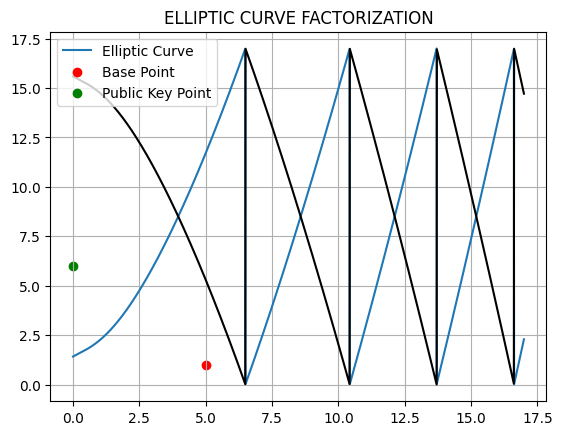

In [150]:
import matplotlib.pyplot as plt
import numpy as np
from ecdsa.ellipticcurve import CurveFp, Point
p = 17
a, b = 2, 2
curve = CurveFp(p, a, b)
base_point = Point(curve, 5, 1)
private_key = 7
public_key_point = private_key * base_point
x_coordinate = public_key_point.x()
x_vals = np.arange(0, p, 0.01)
y_vals_positive = np.sqrt(x_vals**3 + a*x_vals + b) % p
y_vals_negative = -np.sqrt(x_vals**3 + a*x_vals + b) % p
plt.plot(x_vals, y_vals_positive, label='Elliptic Curve')
plt.plot(x_vals, y_vals_negative, color='black')
plt.scatter(base_point.x(), base_point.y(), color='red', label='Base Point')
plt.scatter(public_key_point.x(), public_key_point.y(), color='green', label='Public Key Point')
plt.title('ELLIPTIC CURVE FACTORIZATION')
plt.legend()
plt.grid(True)
plt.show()

**Exponential Search Tree**

In [154]:
class ExponentialSearchTree:
    class Node:
        def __init__(self, key):
            self.key = key
            self.left = None
            self.right = None
    def __init__(self):
        self.root = None
    def insert(self, key):
        self.root = self._insert(self.root, key)
    def _insert(self, root, key):
        if root is None:
            return self.Node(key)
        if key < root.key:
            root.left = self._insert(root.left, key)
        elif key > root.key:
            root.right = self._insert(root.right, key)
        return root
    def search(self, key):
        return self._search(self.root, key)
    def _search(self, root, key):
        if root is None or root.key == key:
            return root
        if key < root.key:
            return self._search(root.left, key)
        else:
            return self._search(root.right, key)
    def inorder_traversal(self):
        result = []
        self._inorder_traversal(self.root, result)
        return result
    def _inorder_traversal(self, root, result):
        if root:
            self._inorder_traversal(root.left, result)
            result.append(root.key)
            self._inorder_traversal(root.right, result)
est = ExponentialSearchTree()
keys = [4, 2, 6, 1, 3, 5, 7]
for key in keys:
    est.insert(key)
search_key = 3
search_result = est.search(search_key)
if search_result:
    print(f"Key {search_key} found in the tree.")
else:
    print(f"Key {search_key} not found in the tree.")

Key 3 found in the tree.


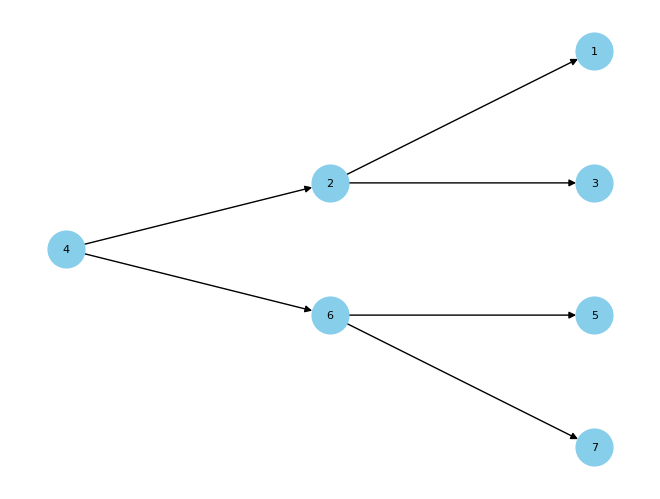

In [155]:
import networkx as nx
import matplotlib.pyplot as plt
class ExponentialSearchTree:
    def __init__(self):
        self.root = None
    class Node:
        def __init__(self, key):
            self.key = key
            self.left = None
            self.right = None
    def insert(self, key):
        self.root = self._insert(self.root, key)
    def _insert(self, root, key):
        if root is None:
            return self.Node(key)
        if key < root.key:
            root.left = self._insert(root.left, key)
        elif key > root.key:
            root.right = self._insert(root.right, key)
        return root
    def search(self, key):
        return self._search(self.root, key)
    def _search(self, root, key):
        if root is None or root.key == key:
            return root
        if key < root.key:
            return self._search(root.left, key)
        else:
            return self._search(root.right, key)
    def plot_tree(self):
        G = nx.DiGraph()
        self._build_graph(G, self.root)
        pos = nx.multipartite_layout(G, subset_key="subset")
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black")
        plt.show()
    def _build_graph(self, G, root, subset=None):
        if root:
            G.add_node(root.key, subset=subset)
            if root.left:
                G.add_edge(root.key, root.left.key)
                self._build_graph(G, root.left, subset=subset + 1 if subset is not None else 1)
            if root.right:
                G.add_edge(root.key, root.right.key)
                self._build_graph(G, root.right, subset=subset + 1 if subset is not None else 1)
est = ExponentialSearchTree()
keys = [4, 2, 6, 1, 3, 5, 7]
for key in keys:
    est.insert(key)
est.plot_tree()

**Fat Node Tree**

In [159]:
class FatNode:
    def __init__(self, key, data=None):
        self.key = key
        self.data = data
        self.left = None
        self.right = None
        self.height = 1
        self.size = 1
class FatNodeTree:
    def __init__(self):
        self.root = None
    def _get_height(self, node):
        if not node:
            return 0
        return node.height
    def _get_size(self, node):
        if not node:
            return 0
        return node.size
    def _update_height_and_size(self, node):
        if not node:
            return
        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))
        node.size = 1 + self._get_size(node.left) + self._get_size(node.right)
    def _balance_factor(self, node):
        if not node:
            return 0
        return self._get_height(node.left) - self._get_height(node.right)
    def _right_rotate(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        self._update_height_and_size(y)
        self._update_height_and_size(x)
        return x
    def _left_rotate(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        self._update_height_and_size(x)
        self._update_height_and_size(y)
        return y
    def insert(self, key, data=None):
        self.root = self._insert(self.root, key, data)
    def _insert(self, root, key, data):
        if not root:
            return FatNode(key, data)
        if key < root.key:
            root.left = self._insert(root.left, key, data)
        elif key > root.key:
            root.right = self._insert(root.right, key, data)
        else:
            return root
        self._update_height_and_size(root)
        balance = self._balance_factor(root)
        if balance > 1 and key < root.left.key:
            return self._right_rotate(root)
        if balance < -1 and key > root.right.key:
            return self._left_rotate(root)
        if balance > 1 and key > root.left.key:
            root.left = self._left_rotate(root.left)
            return self._right_rotate(root)
        if balance < -1 and key < root.right.key:
            root.right = self._right_rotate(root.right)
            return self._left_rotate(root)
        return root
    def search(self, key):
        return self._search(self.root, key)
    def _search(self, root, key):
        if not root or root.key == key:
            return root
        if key < root.key:
            return self._search(root.left, key)
        return self._search(root.right, key)
    def delete(self, key):
        self.root = self._delete(self.root, key)
    def _delete(self, root, key):
        if not root:
            return root
        if key < root.key:
            root.left = self._delete(root.left, key)
        elif key > root.key:
            root.right = self._delete(root.right, key)
        else:
            if not root.left:
                return root.right
            elif not root.right:
                return root.left
            temp = self._min_value_node(root.right)
            root.key = temp.key
            root.right = self._delete(root.right, temp.key)
        self._update_height_and_size(root)
        balance = self._balance_factor(root)
        if balance > 1 and self._balance_factor(root.left) >= 0:
            return self._right_rotate(root)
        if balance > 1 and self._balance_factor(root.left) < 0:
            root.left = self._left_rotate(root.left)
            return self._right_rotate(root)
        if balance < -1 and self._balance_factor(root.right) <= 0:
            return self._left_rotate(root)
        if balance < -1 and self._balance_factor(root.right) > 0:
            root.right = self._right_rotate(root.right)
            return self._left_rotate(root)
        return root
    def _min_value_node(self, node):
        current = node
        while current.left:
            current = current.left
        return current
    def inorder_traversal(self):
        result = []
        self._inorder_traversal(self.root, result)
        return result
    def _inorder_traversal(self, root, result):
        if root:
            self._inorder_traversal(root.left, result)
            result.append((root.key, root.data))
            self._inorder_traversal(root.right, result)
    def preorder_traversal(self):
        result = []
        self._preorder_traversal(self.root, result)
        return result
    def _preorder_traversal(self, root, result):
        if root:
            result.append((root.key, root.data))
            self._preorder_traversal(root.left, result)
            self._preorder_traversal(root.right, result)
    def postorder_traversal(self):
        result = []
        self._postorder_traversal(self.root, result)
        return result
    def _postorder_traversal(self, root, result):
        if root:
            self._postorder_traversal(root.left, result)
            self._postorder_traversal(root.right, result)
            result.append((root.key, root.data))
fat_node_tree = FatNodeTree()
keys_data_pairs = [(4, 'A'), (2, 'B'), (6, 'C'), (1, 'D'), (3, 'E'), (5, 'F'), (7, 'G')]
for key, data in keys_data_pairs:
    fat_node_tree.insert(key, data)
print("In-order Traversal =", fat_node_tree.inorder_traversal())
print("Pre-order Traversal =", fat_node_tree.preorder_traversal())
print("Post-order Traversal =", fat_node_tree.postorder_traversal())
search_key = 3
search_result = fat_node_tree.search(search_key)
if search_result:
    print(f"Search result for key {search_key} = {search_result.key}, {search_result.data}")
else:
    print(f"Key {search_key} not found")
delete_key = 5
fat_node_tree.delete(delete_key)
print(f"Deleted node with key {delete_key}")
print("In-order Traversal after deletion =", fat_node_tree.inorder_traversal())
print("Pre-order Traversal after deletion =", fat_node_tree.preorder_traversal())
print("Post-order Traversal after deletion =", fat_node_tree.postorder_traversal())

In-order Traversal = [(1, 'D'), (2, 'B'), (3, 'E'), (4, 'A'), (5, 'F'), (6, 'C'), (7, 'G')]
Pre-order Traversal = [(4, 'A'), (2, 'B'), (1, 'D'), (3, 'E'), (6, 'C'), (5, 'F'), (7, 'G')]
Post-order Traversal = [(1, 'D'), (3, 'E'), (2, 'B'), (5, 'F'), (7, 'G'), (6, 'C'), (4, 'A')]
Search result for key 3 = 3, E
Deleted node with key 5
In-order Traversal after deletion = [(1, 'D'), (2, 'B'), (3, 'E'), (4, 'A'), (6, 'C'), (7, 'G')]
Pre-order Traversal after deletion = [(4, 'A'), (2, 'B'), (1, 'D'), (3, 'E'), (6, 'C'), (7, 'G')]
Post-order Traversal after deletion = [(1, 'D'), (3, 'E'), (2, 'B'), (7, 'G'), (6, 'C'), (4, 'A')]


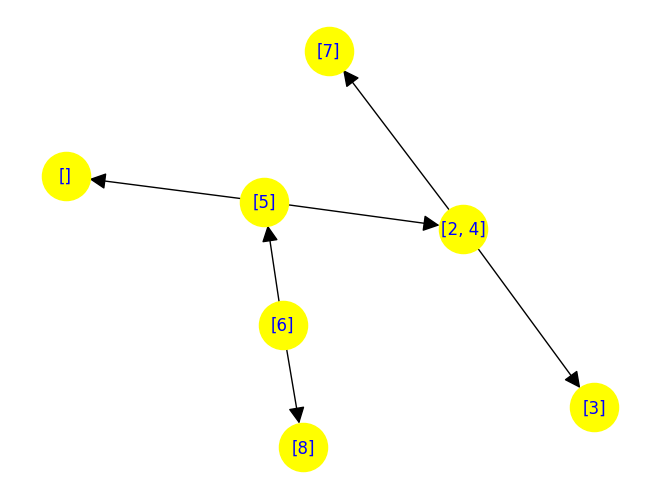

In [183]:
import networkx as nx
import matplotlib.pyplot as plt
class FatNode:
    def __init__(self, keys=None, children=None, data=None):
        self.keys = keys or []
        self.children = children or []
        self.data = data
class FatNodeTree:
    def __init__(self, order):
        self.root = FatNode()
        self.order = order
    def insert(self, key, data):
        if not self.root.keys:
            self.root.keys.append(key)
            self.root.data = data
        else:
            self._insert(self.root, key, data)
    def _insert(self, node, key, data):
        if len(node.keys) < self.order - 1:
            node.keys.append(key)
            node.keys.sort()
            node.data = data
        else:
            mid = len(node.keys) // 2
            new_key = node.keys[mid]
            new_data = node.data
            left_child = FatNode(node.keys[:mid], node.children[:mid + 1], node.data)
            right_child = FatNode(node.keys[mid + 1:], node.children[mid + 1:], node.data)
            node.keys = [new_key]
            node.data = new_data
            node.children = [left_child, right_child]
            if key < new_key:
                self._insert(left_child, key, data)
            else:
                self._insert(right_child, key, data)
    def plot_tree(self):
        G = nx.DiGraph()
        self._build_graph(G, self.root)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=1200, node_color="yellow", font_size=12, font_color="blue", arrowsize=25)
        plt.show()
    def _build_graph(self, G, node):
        if node:
            for child in node.children:
                self._build_graph(G, child)
                G.add_edge(str(node.keys), str(child.keys))
fat_node_tree = FatNodeTree(order=3)
keys_data_pairs = [(5, 'A'), (3, 'B'), (7, 'C'), (2, 'D'), (4, 'E'), (6, 'F'), (8, 'G')]
for key, data in keys_data_pairs:
    fat_node_tree.insert(key, data)
fat_node_tree.plot_tree()

**Fenwick Tree**

In [185]:
class FenwickTree:
    def __init__(self, size):
        self.size = size
        self.tree = [0] * (size + 1)
    def update(self, index, delta):
        while index <= self.size:
            self.tree[index] += delta
            index += index & -index
    def query(self, index):
        result = 0
        while index > 0:
            result += self.tree[index]
            index -= index & -index
        return result
    def range_query(self, start, end):
        return self.query(end) - self.query(start - 1)
size = 10
fenwick_tree = FenwickTree(size)
fenwick_tree.update(1, 3)
fenwick_tree.update(3, 2)
fenwick_tree.update(5, 5)
print(f"Prefix sum at index 5 = {fenwick_tree.query(5)}")
print(f"Range sum from index 2 to 7 = {fenwick_tree.range_query(2, 7)}")

Prefix sum at index 5 = 10
Range sum from index 2 to 7 = 7


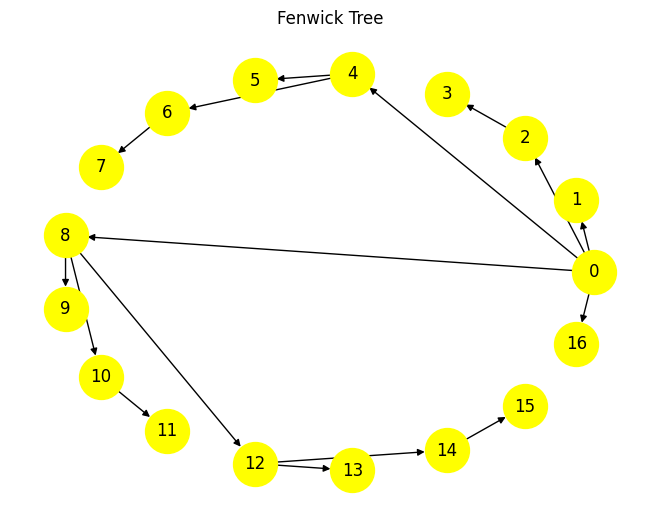

In [193]:
import networkx as nx
import matplotlib.pyplot as plt
class FenwickTree:
    def __init__(self, size):
        self.size = size
        self.tree = [0] * (size + 1)
    def update(self, i, delta):
        while i <= self.size:
            self.tree[i] += delta
            i += i & -i
    def query(self, i):
        result = 0
        while i > 0:
            result += self.tree[i]
            i -= i & -i
        return result
    def visualize_tree(self):
        G = nx.DiGraph()
        for i in range(1, self.size + 1):
            parent = i - (i & -i)
            G.add_edge(parent, i)
        pos = nx.circular_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=1000, node_color="yellow", font_size=12, font_color="black")
        plt.title('Fenwick Tree')
        plt.show()
fenwick_tree = FenwickTree(16)
fenwick_tree.visualize_tree()

In [197]:
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 32 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

In [198]:
!pip install pygraphviz

  Using cached pygraphviz-1.12.tar.gz (104 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.12-cp310-cp310-linux_x86_64.whl size=168137 sha256=ae4f286730d396b26618841df229af4996e1c2a2b067eab226e128c6ff37e852
  Stored in directory: /root/.cache/pip/wheels/1d/ee/b5/a2f54f9e9b3951599c05dcce270ca85e472f8e6cec470e397a
Successfully built pygraphviz


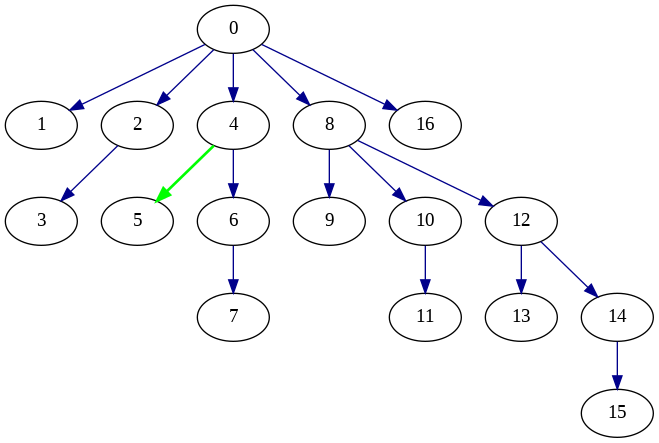

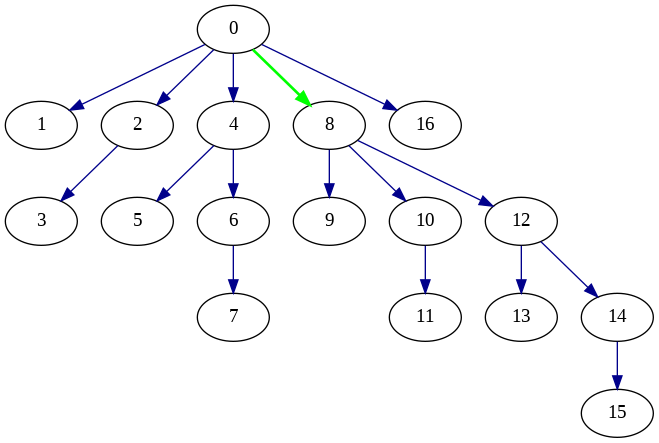

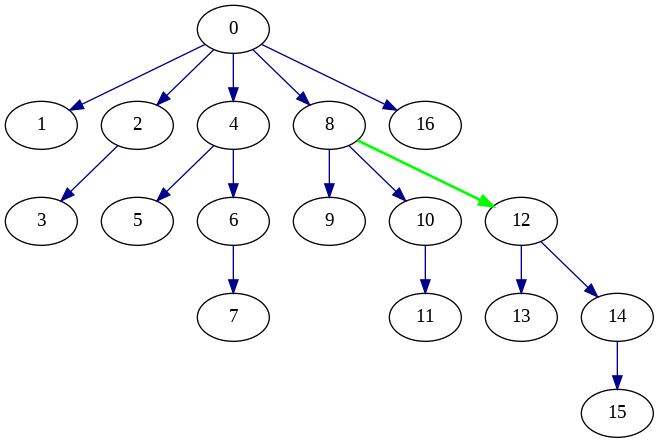

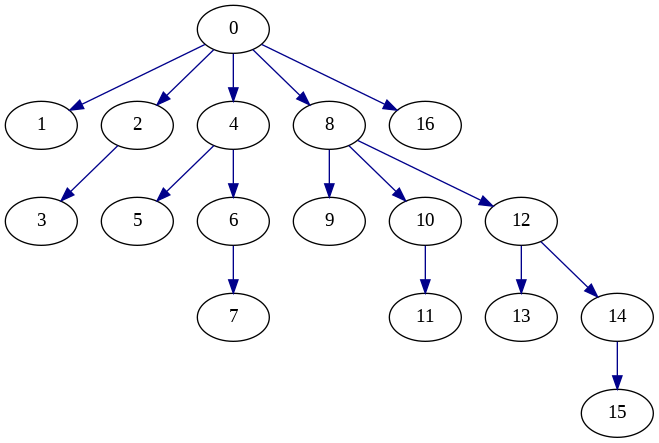

In [206]:
import networkx as nx
import pygraphviz as pgv
from IPython.display import Image, display
class FenwickTree:
    def __init__(self, size):
        self.size = size
        self.tree = [0] * (size + 1)
    def update(self, i, delta):
        original_i = i
        while i <= self.size:
            self.tree[i] += delta
            i += i & -i
        self.visualize_update(original_i, delta)
    def query(self, i):
        result = 0
        while i > 0:
            result += self.tree[i]
            i -= i & -i
        return result
    def visualize_update(self, i, delta):
        G = pgv.AGraph(directed=True)
        for j in range(1, self.size + 1):
            parent = j - (j & -j)
            G.add_edge(parent, j, color='darkblue')
        G.add_edge(i - (i & -i), i, color='green', penwidth=2)
        G.layout(prog='dot')
        G.draw('fenwick_tree_update.png')
        display(Image(filename='fenwick_tree_update.png'))
    def visualize_tree(self):
        G = pgv.AGraph(directed=True)
        for i in range(1, self.size + 1):
            parent = i - (i & -i)
            G.add_edge(parent, i, color='darkblue')
        G.layout(prog='dot')
        G.draw('fenwick_tree.png')
        display(Image(filename='fenwick_tree.png'))
fenwick_tree = FenwickTree(16)
fenwick_tree.update(5, 3)
fenwick_tree.update(8, 2)
fenwick_tree.update(12, 5)
fenwick_tree.visualize_tree()

**Fibonacci Heap**

In [227]:
import math
class Node:
    def __init__(self, key):
        self.key = key
        self.degree = 0
        self.left_sibling = self
        self.right_sibling = self
        self.parent = None
        self.child = None
        self.mark = False
        self.visited = False
class FibonacciHeap:
    def __init__(self):
        self.n = 0
        self.min = None
        self.phi = 0
        self.degree = 0
    def make_fib_heap(self):
        return FibonacciHeap()
    def insertion(self, new_node, val):
        new_node = Node(val)
        if self.min is None:
            self.min = new_node
        else:
            self.min.left_sibling.right_sibling = new_node
            new_node.right_sibling = self.min
            new_node.left_sibling = self.min.left_sibling
            self.min.left_sibling = new_node
            if new_node.key < self.min.key:
                self.min = new_node
        self.n += 1
    def find_min_node(self):
        if self.min is None:
            print("Fibonacci heap is empty")
            return None
        return self.min
    def union_heap(self, H1, H2):
        Hnew = self.make_fib_heap()
        Hnew.min = H1.min
        temp1, temp2 = Hnew.min.right_sibling, H2.min.left_sibling
        Hnew.min.right_sibling.left_sibling = H2.min.left_sibling
        Hnew.min.right_sibling = H2.min
        H2.min.left_sibling = Hnew.min
        temp2.right_sibling = temp1
        if (H1.min is None) or (H2.min is not None and H2.min.key < H1.min.key):
            Hnew.min = H2.min
        Hnew.n = H1.n + H2.n
        return Hnew
    def cal_degree(self, n):
        count = 0
        while n > 0:
            n //= 2
            count += 1
        return count
    def consolidate(self):
        degree = self.cal_degree(self.n)
        A = [None] * (degree + 1)
        x = self.min
        while True:
            d = x.degree
            while A[d] is not None:
                y = A[d]
                if x.key > y.key:
                    x, y = y, x
                self.fib_heap_link(y, x)
                A[d] = None
                d += 1
            A[d] = x
            x = x.right_sibling
            if x == self.min:
                break
        self.min = None
        for i in range(degree + 1):
            if A[i] is not None:
                A[i].left_sibling = A[i]
                A[i].right_sibling = A[i]
                if self.min is None:
                    self.min = A[i]
                else:
                    self.min.left_sibling.right_sibling = A[i]
                    A[i].right_sibling = self.min
                    A[i].left_sibling = self.min.left_sibling
                    self.min.left_sibling = A[i]
                    if A[i].key < self.min.key:
                        self.min = A[i]
        return self.min
    def fib_heap_link(self, y, x):
        y.right_sibling.left_sibling = y.left_sibling
        y.left_sibling.right_sibling = y.right_sibling
        if x.right_sibling == x:
            self.min = x
        y.left_sibling = y
        y.right_sibling = y
        y.parent = x
        if x.child is None:
            x.child = y
        y.right_sibling = x.child
        y.left_sibling = x.child.left_sibling
        x.child.left_sibling.right_sibling = y
        x.child.left_sibling = y
        if (y.key) < (x.child.key):
            x.child = y
        x.degree += 1
    def extract_min(self):
        if self.min is None:
            print("The heap is empty")
            return None
        temp = self.min
        pntr = temp
        x = None
        if temp.child is not None:
            x = temp.child
            while True:
                pntr = x.right_sibling
                (self.min.left_sibling).right_sibling = x
                x.right_sibling = self.min
                x.left_sibling = self.min.left_sibling
                self.min.left_sibling = x
                if x.key < self.min.key:
                    self.min = x
                x.parent = None
                x = pntr
                if pntr == temp.child:
                    break
        temp.left_sibling.right_sibling = temp.right_sibling
        temp.right_sibling.left_sibling = temp.left_sibling
        self.min = temp.right_sibling
        if temp == temp.right_sibling and temp.child is None:
            self.min = None
        else:
            self.min = temp.right_sibling
            self.consolidate()
        self.n -= 1
        return temp
    def cut(self, node_to_be_decrease, parent_node):
        if node_to_be_decrease == node_to_be_decrease.right_sibling:
            parent_node.child = None
        node_to_be_decrease.left_sibling.right_sibling = node_to_be_decrease.right_sibling
        node_to_be_decrease.right_sibling.left_sibling = node_to_be_decrease.left_sibling
        if node_to_be_decrease == parent_node.child:
            parent_node.child = node_to_be_decrease.right_sibling
        parent_node.degree -= 1
        node_to_be_decrease.left_sibling = node_to_be_decrease
        node_to_be_decrease.right_sibling = node_to_be_decrease
        self.min.left_sibling.right_sibling = node_to_be_decrease
        node_to_be_decrease.right_sibling = self.min
        node_to_be_decrease.left_sibling = self.min.left_sibling
        self.min.left_sibling = node_to_be_decrease
        node_to_be_decrease.parent = None
        node_to_be_decrease.mark = False
    def cascading_cut(self, parent_node):
        aux = parent_node.parent
        if aux is not None:
            if not parent_node.mark:
                parent_node.mark = True
            else:
                self.cut(parent_node, aux)
                self.cascading_cut(aux)
    def decrease_key(self, node_to_be_decrease, new_key):
        parent_node = node_to_be_decrease.parent
        if (parent_node is not None) and (node_to_be_decrease.key < parent_node.key):
            self.cut(node_to_be_decrease, parent_node)
            self.cascading_cut(parent_node)
        if node_to_be_decrease.key < self.min.key:
            self.min = node_to_be_decrease
    def find_node(self, n, key, new_key):
        find_use = n
        find_use.visited = True
        if find_use.key == key:
            find_use.visited = False
            f = find_use
            self.decrease_key(f, new_key)
        if find_use.child is not None:
            self.find_node(find_use.child, key, new_key)
        if not find_use.right_sibling.visited:
            self.find_node(find_use.right_sibling, key, new_key)
        find_use.visited = False
def insertion_procedure():
    temp = FibonacciHeap()
    no_of_nodes = int(input("Enter number of nodes to be inserted: "))
    for i in range(1, no_of_nodes + 1):
        ele = int(input(f"Node {i} and its key value: "))
        temp.insertion(None, ele)
    return temp
def delete_node(H, dec_key):
    find_node(H, H.min, dec_key, -5000)
    p = extract_min(H)
    if p is not None:
        print("Node deleted")
    else:
        print("Node not deleted: some error")
def print_heap(n):
    x = n
    while True:
        if x.child is None:
            print(f"Node with no child ({x.key})")
        else:
            print(f"Node({x.key}) with child ({x.child.key})")
            print_heap(x.child)
        if x.right_sibling == n:
            break
        x = x.right_sibling
def main():
    new_node, min_node, extracted_min, node_to_be_decrease, find_use = None, None, None, None, None
    heap, h1, h2 = FibonacciHeap(), None, None
    operation_no, new_key, dec_key, ele, i, no_of_nodes = 0, 0, 0, 0, 0, 0
    while True:
        print("\nOperations\n1. Create Fibonacci heap\n2. Insert nodes into Fibonacci heap\n3. Find min")
        print("4. Union\n5. Extract min\n6. Decrease key\n7. Delete node\n8. Print heap\n9. Exit")
        operation_no = int(input("Enter operation number: "))
        if operation_no == 1:
            heap = FibonacciHeap()
        elif operation_no == 2:
            if heap is None:
                heap = FibonacciHeap()
            no_of_nodes = int(input("Enter number of nodes to be inserted: "))
            for i in range(1, no_of_nodes + 1):
                ele = int(input(f"Node {i} and its key value: "))
                heap.insertion(new_node, ele)
        elif operation_no == 3:
            min_node = heap.find_min_node()
            if min_node is None:
                print("No minimum value")
            else:
                print(f"Min value: {min_node.key}")
        elif operation_no == 4:
            if heap is None:
                print("No Fibonacci heap created")
                break
            h1 = insertion_procedure()
            heap = heap.union_heap(heap, h1)
            print("Unified Heap:")
            print_heap(heap.min)
        elif operation_no == 5:
            if heap is None:
                print("Empty Fibonacci heap")
            else:
                extracted_min = heap.extract_min()
                print(f"Min value: {extracted_min.key}")
                print("Updated heap:")
                print_heap(heap.min)
        elif operation_no == 6:
            if heap is None:
                print("Fibonacci heap is empty")
            else:
                dec_key = int(input("Node to be decreased: "))
                new_key = int(input("Enter the new key: "))
                find_use = heap.min
                heap.find_node(find_use, dec_key, new_key)
                print("Key decreased - Corresponding heap:")
                print_heap(heap.min)
        elif operation_no == 7:
            if heap is None:
                print("Fibonacci heap is empty")
            else:
                dec_key = int(input("Enter node key to be deleted: "))
                delete_node(heap, dec_key)
                print("Node Deleted - Corresponding heap:")
                print_heap(heap.min)
        elif operation_no == 8:
            print_heap(heap.min)
        elif operation_no == 9:
            break
        else:
            print("Invalid choice")
if __name__ == "__main__":
    main()


Operations
1. Create Fibonacci heap
2. Insert nodes into Fibonacci heap
3. Find min
4. Union
5. Extract min
6. Decrease key
7. Delete node
8. Print heap
9. Exit
Enter operation number: 1

Operations
1. Create Fibonacci heap
2. Insert nodes into Fibonacci heap
3. Find min
4. Union
5. Extract min
6. Decrease key
7. Delete node
8. Print heap
9. Exit
Enter operation number: 2
Enter number of nodes to be inserted: 4
Node 1 and its key value: 5
Node 2 and its key value: 10
Node 3 and its key value: 15
Node 4 and its key value: 20

Operations
1. Create Fibonacci heap
2. Insert nodes into Fibonacci heap
3. Find min
4. Union
5. Extract min
6. Decrease key
7. Delete node
8. Print heap
9. Exit
Enter operation number: 8
Node with no child (5)
Node with no child (10)
Node with no child (15)
Node with no child (20)

Operations
1. Create Fibonacci heap
2. Insert nodes into Fibonacci heap
3. Find min
4. Union
5. Extract min
6. Decrease key
7. Delete node
8. Print heap
9. Exit
Enter operation number: 

**Fusion Tree**

In [239]:
class FusionTreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []
class FusionTree:
    def __init__(self, elements_per_node):
        self.root = None
        self.elements_per_node = elements_per_node
    def insert_node(self, node, value):
        if not node:
            return FusionTreeNode(value)
        if value < node.value:
            node.children.append(self.insert_node(None, value))
            node.children.sort(key=lambda x: x.value)
        else:
            for child in node.children:
                if value < child.value:
                    self.insert_node(child, value)
                    break
        return node
    def search_node(self, node, value):
        if not node:
            return False
        if value == node.value:
            return True
        for child in node.children:
            if value < child.value:
                return self.search_node(child, value)
        return False
    def delete_node(self, node, value):
        if not node:
            return None
        if value == node.value:
            del node
            return None
        for i, child in enumerate(node.children):
            if value < child.value:
                node.children[i] = self.delete_node(child, value)
        return node
    def inorder_traversal(self, node):
        if node:
            for child in node.children:
                self.inorder_traversal(child)
                print(node.value, end=" ")
    def preorder_traversal(self, node):
        if node:
            print(node.value, end=" ")
            for child in node.children:
                self.preorder_traversal(child)
    def postorder_traversal(self, node):
        if node:
            for child in node.children:
                self.postorder_traversal(child)
            print(node.value, end=" ")
    def insert(self, value):
        self.root = self.insert_node(self.root, value)
    def search(self, value):
        return self.search_node(self.root, value)
    def remove(self, value):
        self.root = self.delete_node(self.root, value)
    def print_inorder(self):
        self.inorder_traversal(self.root)
        print()
    def print_preorder(self):
        self.preorder_traversal(self.root)
        print()
    def print_postorder(self):
        self.postorder_traversal(self.root)
        print()
if __name__ == "__main__":
    fusion_tree = FusionTree(elements_per_node=3)
    fusion_tree.insert(5)
    fusion_tree.insert(8)
    fusion_tree.insert(3)
    fusion_tree.insert(10)
    fusion_tree.insert(7)
    print("Inorder Traversal:")
    fusion_tree.print_inorder()
    print("Preorder Traversal:")
    fusion_tree.print_preorder()
    print("Postorder Traversal:")
    fusion_tree.print_postorder()

Inorder Traversal:
5 
Preorder Traversal:
5 3 
Postorder Traversal:
3 5 


**Greedy Dual Tree**

In [240]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
class GreedyDualTree:
    def __init__(self):
        self.root = None
    def insert(self, value):
        if not self.root:
            self.root = TreeNode(value)
        else:
            self._insert(self.root, value)
    def _insert(self, node, value):
        if value < node.value:
            if node.left:
                self._insert(node.left, value)
            else:
                node.left = TreeNode(value)
        else:
            if node.right:
                self._insert(node.right, value)
            else:
                node.right = TreeNode(value)
    def greedy_traversal(self):
        result = []
        self._greedy_traversal(self.root, result)
        return result
    def _greedy_traversal(self, node, result):
        if node:
            result.append(node.value)
            if node.left:
                self._greedy_traversal(node.left, result)
            if node.right:
                self._greedy_traversal(node.right, result)
if __name__ == "__main__":
    dual_tree = GreedyDualTree()
    values_to_insert = [5, 3, 7, 2, 4, 6, 8]
    for value in values_to_insert:
        dual_tree.insert(value)
    print("Greedy Dual Tree Traversal:", dual_tree.greedy_traversal())

Greedy Dual Tree Traversal: [5, 3, 2, 4, 7, 6, 8]


**Hash Array Mapped Trie**

In [246]:
class HAMTNode:
    def __init__(self, key, value=None):
        self.key = key
        self.value = value
        self.children = {}
class HAMT:
    def __init__(self):
        self.root = HAMTNode(None)
    def _get_bucket_index(self, key, level):
        return (key >> level) & 0xF
    def insert(self, key, value):
        current_node = self.root
        level = 0
        while True:
            index = self._get_bucket_index(key, level)
            if index not in current_node.children:
                current_node.children[index] = HAMTNode(key)
            current_node = current_node.children[index]
            if current_node.key is None or current_node.key == key:
                current_node.value = value
                return
            if not isinstance(current_node.key, int) or current_node.key == key:
                current_node.key = key
                current_node.value = value
                return
            level += 4
    def search(self, key):
        current_node = self.root
        level = 0
        while True:
            index = self._get_bucket_index(key, level)
            if index not in current_node.children:
                return None
            current_node = current_node.children[index]
            if current_node.key == key:
                return current_node.value
            if not isinstance(current_node.key, int):
                return None
            level += 4
    def delete(self, key):
        current_node = self.root
        parent = None
        parent_index = None
        level = 0
        while True:
            index = self._get_bucket_index(key, level)
            if index not in current_node.children:
                return
            parent = current_node
            parent_index = index
            current_node = current_node.children[index]
            if current_node.key == key:
                if isinstance(current_node.key, int):
                    del parent.children[parent_index]
                else:
                    current_node.key = None
                    current_node.value = None
                return
            if not isinstance(current_node.key, int):
                return
            level += 4
hamt = HAMT()
hamt.insert(5, "Five")
hamt.insert(10, "Ten")
hamt.insert(3, "Three")
print(hamt.search(5))
print(hamt.search(7))
hamt.delete(5)
print(hamt.search(5))

Five
None
None


In [245]:
import graphviz
class TrieNode:
    def __init__(self):
        self.children = {}
        self.value = None
class HAMT:
    def __init__(self):
        self.root = TrieNode()
    def insert(self, key, value):
        node = self.root
        for bit in key:
            if bit not in node.children:
                node.children[bit] = TrieNode()
            node = node.children[bit]
        node.value = value
    def visualize(self):
        graph = graphviz.Digraph(comment='HAMT')
        def _visualize_node(node, path=''):
            if node.value is not None:
                graph.node(path, label=str(node.value))
            for bit, child in node.children.items():
                _visualize_node(child, path + str(bit))
        _visualize_node(self.root)
        return graph
if __name__ == "__main__":
    hamt = HAMT()
    hamt.insert("011", "Value1")
    hamt.insert("101", "Value2")
    hamt.insert("001", "Value3")
    graph = hamt.visualize()
    graph.render('hamt', format='png', cleanup=True)
    print("HAMT visualization created. Check the 'hamt.png' file.")

HAMT visualization created. Check the 'hamt.png' file.


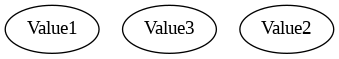

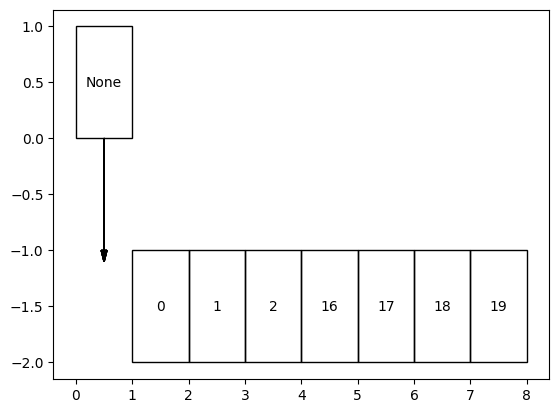

In [244]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
class HAMTNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.children = {}
def visualize_hamt(hamt_node, level=0, position=(0, 0), ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.add_patch(patches.Rectangle(position, 1, 1, fill=None, edgecolor='black'))
    ax.text(position[0] + 0.5, position[1] + 0.5, str(hamt_node.key), ha='center', va='center')
    for i, (key, child) in enumerate(hamt_node.children.items()):
        child_position = (position[0] + i + 1, position[1] - 2)
        ax.arrow(position[0] + 0.5, position[1], 0, -1, color='black', head_width=0.1, head_length=0.1)
        visualize_hamt(child, level + 1, child_position, ax)
def main():
    root = HAMTNode(None, None)
    root.children = {
        0: HAMTNode(0, 'A'),
        1: HAMTNode(1, 'B'),
        2: HAMTNode(2, 'C'),
        16: HAMTNode(16, 'D'),
        17: HAMTNode(17, 'E'),
        18: HAMTNode(18, 'F'),
        19: HAMTNode(19, 'G'),
    }
    visualize_hamt(root)
    plt.show()
if __name__ == "__main__":
    main()

**Hash Chaining with Dynamic Perfect Hashing**

In [247]:
class DynamicPerfectHashing:
    def __init__(self):
        self.size = 8
        self.primary_hash_table = [None] * self.size
    def hash_function(self, key, level):
        return (key + level) % self.size
    def resize(self):
        self.size *= 2
        new_table = [None] * self.size
        for i, chain in enumerate(self.primary_hash_table):
            if chain:
                for key in chain:
                    new_index = self.hash_function(key, 0)
                    if not new_table[new_index]:
                        new_table[new_index] = [key]
                    else:
                        new_table[new_index].append(key)
        self.primary_hash_table = new_table
    def insert(self, key):
        level = 0
        while True:
            index = self.hash_function(key, level)
            if not self.primary_hash_table[index]:
                self.primary_hash_table[index] = [key]
                return
            chain = self.primary_hash_table[index]
            secondary_index = key % len(chain)
            if chain[secondary_index] is None:
                chain[secondary_index] = key
                return
            level += 1
            if level >= self.size:
                self.resize()
    def search(self, key):
        level = 0
        while True:
            index = self.hash_function(key, level)
            if not self.primary_hash_table[index]:
                return None
            chain = self.primary_hash_table[index]
            secondary_index = key % len(chain)
            if chain[secondary_index] == key:
                return key
            level += 1
            if level >= self.size:
                return None
perfect_hashing = DynamicPerfectHashing()
keys = [5, 10, 3, 7, 12, 20]
for key in keys:
    perfect_hashing.insert(key)
for key in keys:
    result = perfect_hashing.search(key)
    print(f"Key {key}: {result}")

Key 5: 5
Key 10: 10
Key 3: 3
Key 7: 7
Key 12: 12
Key 20: 20


In [251]:
import random
class DynamicPerfectHashing:
    def __init__(self):
        self.hash_table = []
        self.coefficients = [(random.randint(1, 2) % 1, random.randint(0, 2))]
        self.m = 2
        self.n = 0
    def hash_function(self, a, b, x):
        return (a * x + b) % self.m
    def resize(self):
        self.m *= 2
        self.coefficients[0] = (random.randint(1, self.m - 1), random.randint(0, self.m - 1))
        new_hash_table = [[] for _ in range(self.m)]
        for chain in self.hash_table:
            for element in chain:
                h = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], element)
                new_hash_table[h].append(element)
        self.hash_table = new_hash_table
    def insert(self, key):
        if self.n > 4 * self.m:
            self.resize()
        h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        if h1 >= len(self.hash_table):
            self.hash_table.extend([[] for _ in range(h1 - len(self.hash_table) + 1)])
        if key in self.hash_table[h1]:
            return
        while self.hash_table[h1]:
            self.coefficients.append((random.randint(1, self.m - 1), random.randint(0, self.m - 1)))
            self.resize()
            h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        self.hash_table[h1].append(key)
        self.n += 1
    def search(self, key):
        h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        return h1 < len(self.hash_table) and key in self.hash_table[h1]
dph = DynamicPerfectHashing()
dph.insert(5)
dph.insert(15)
dph.insert(25)
print("Search 5:", "Found" if dph.search(5) else "Not found")
print("Search 10:", "Found" if dph.search(10) else "Not found")

Search 5: Found
Search 10: Not found


In [252]:
import random
import graphviz
class DynamicPerfectHashing:
    def __init__(self):
        self.hash_table = []
        self.coefficients = [(random.randint(1, 2) % 1, random.randint(0, 2))]
        self.m = 2
        self.n = 0
    def hash_function(self, a, b, x):
        return (a * x + b) % self.m
    def resize(self):
        self.m *= 2
        self.coefficients[0] = (random.randint(1, self.m - 1), random.randint(0, self.m - 1))
        new_hash_table = [[] for _ in range(self.m)]
        for chain in self.hash_table:
            for element in chain:
                h = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], element)
                new_hash_table[h].append(element)
        self.hash_table = new_hash_table
    def insert(self, key):
        if self.n > 4 * self.m:
            self.resize()
        h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        if h1 >= len(self.hash_table):
            self.hash_table.extend([[] for _ in range(h1 - len(self.hash_table) + 1)])
        if key in self.hash_table[h1]:
            return
        while self.hash_table[h1]:
            self.coefficients.append((random.randint(1, self.m - 1), random.randint(0, self.m - 1)))
            self.resize()
            h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        self.hash_table[h1].append(key)
        self.n += 1
    def search(self, key):
        h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        return h1 < len(self.hash_table) and key in self.hash_table[h1]
    def visualize_diagram(self):
        dot = graphviz.Digraph(comment='Dynamic Hashing')
        for i, chain in enumerate(self.hash_table):
            dot.node(str(i), label=' | '.join(map(str, chain)))
        dot.render('hash_chaining_diagram', format='png', cleanup=True)
        dot.view()
dph = DynamicPerfectHashing()
dph.insert(5)
dph.insert(15)
dph.insert(25)
dph.visualize_diagram()

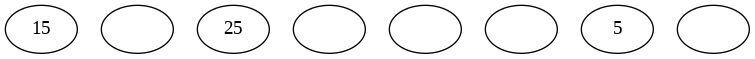

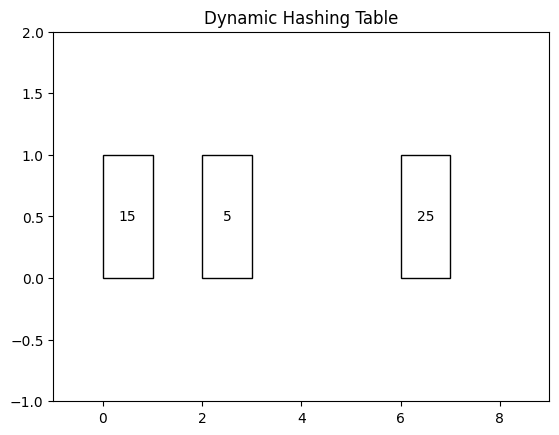

In [253]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
class DynamicPerfectHashing:
    def __init__(self):
        self.hash_table = []
        self.coefficients = [(random.randint(1, 2) % 1, random.randint(0, 2))]
        self.m = 2
        self.n = 0
    def hash_function(self, a, b, x):
        return (a * x + b) % self.m
    def resize(self):
        self.m *= 2
        self.coefficients[0] = (random.randint(1, self.m - 1), random.randint(0, self.m - 1))
        new_hash_table = [[] for _ in range(self.m)]
        for chain in self.hash_table:
            for element in chain:
                h = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], element)
                new_hash_table[h].append(element)
        self.hash_table = new_hash_table
    def insert(self, key):
        if self.n > 4 * self.m:
            self.resize()
        h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        if h1 >= len(self.hash_table):
            self.hash_table.extend([[] for _ in range(h1 - len(self.hash_table) + 1)])
        if key in self.hash_table[h1]:
            return
        while self.hash_table[h1]:
            self.coefficients.append((random.randint(1, self.m - 1), random.randint(0, self.m - 1)))
            self.resize()
            h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        self.hash_table[h1].append(key)
        self.n += 1
    def search(self, key):
        h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        return h1 < len(self.hash_table) and key in self.hash_table[h1]
    def visualize_diagram(self):
        fig, ax = plt.subplots()
        ax.set_xlim(-1, len(self.hash_table) + 1)
        ax.set_ylim(-1, max(map(len, self.hash_table)) + 1)
        for i, chain in enumerate(self.hash_table):
            for j, element in enumerate(chain):
                ax.add_patch(patches.Rectangle((i, j), 1, 1, edgecolor='black', facecolor='none'))
                ax.text(i + 0.5, j + 0.5, str(element), ha='center', va='center')
        plt.title("Dynamic Hashing Table")
        plt.show()
dph = DynamicPerfectHashing()
dph.insert(5)
dph.insert(15)
dph.insert(25)
dph.visualize_diagram()

**HyperLogLog**

In [255]:
import math
import hashlib
class HyperLogLog:
    def __init__(self, precision=10):
        self.precision = precision
        self.num_buckets = 2**precision
        self.registers = [0] * self.num_buckets
    def hash_function(self, element):
        hashed_value = hashlib.md5(str(element).encode('utf-8')).hexdigest()
        return int(hashed_value, 16)
    def count_leading_zeros(self, value):
        binary_representation = bin(value)[2:]
        return len(binary_representation) - len(binary_representation.rstrip('0'))
    def add_element(self, element):
        hashed_value = self.hash_function(element)
        bucket_index = hashed_value % self.num_buckets
        register_value = self.count_leading_zeros(hashed_value // self.num_buckets) + 1
        self.registers[bucket_index] = max(self.registers[bucket_index], register_value)
    def estimate_cardinality(self):
        alpha_m = 0.7213 / (1 + 1.079 / self.num_buckets)
        harmonic_mean = sum(2**(-reg) for reg in self.registers)
        raw_estimate = alpha_m * (1 / harmonic_mean)
        if raw_estimate <= 2.5 * self.num_buckets:
            zero_registers = self.registers.count(0)
            if zero_registers != 0:
                corrected_estimate = self.num_buckets * math.log(self.num_buckets / zero_registers)
            else:
                corrected_estimate = raw_estimate
        elif raw_estimate <= 2**32 / 30.0:
            corrected_estimate = raw_estimate
        else:
            corrected_estimate = -2**32 * math.log(1 - raw_estimate / 2**32)
        return corrected_estimate
hll = HyperLogLog(precision=10)
elements = [1, 2, 3, 4, 5, 1, 2, 6, 7, 8, 9, 10]
for element in elements:
    hll.add_element(element)
estimated_cardinality = hll.estimate_cardinality()
print(f"Estimated Cardinality: {estimated_cardinality}")

Estimated Cardinality: 9.039784062530877


**Implicit Graph**

In [257]:
class ImplicitGraph:
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
    def is_valid_cell(self, row, col):
        return 0 <= row < self.rows and 0 <= col < self.cols
    def neighbors(self, row, col):
        possible_neighbors = [(row-1, col), (row+1, col), (row, col-1), (row, col+1)]
        valid_neighbors = [(r, c) for r, c in possible_neighbors if self.is_valid_cell(r, c)]
        return valid_neighbors
rows, cols = 3, 3
graph = ImplicitGraph(rows, cols)
for r in range(rows):
    for c in range(cols):
        print(f"Neighbors of cell ({r}, {c}) = {graph.neighbors(r, c)}")

Neighbors of cell (0, 0) = [(1, 0), (0, 1)]
Neighbors of cell (0, 1) = [(1, 1), (0, 0), (0, 2)]
Neighbors of cell (0, 2) = [(1, 2), (0, 1)]
Neighbors of cell (1, 0) = [(0, 0), (2, 0), (1, 1)]
Neighbors of cell (1, 1) = [(0, 1), (2, 1), (1, 0), (1, 2)]
Neighbors of cell (1, 2) = [(0, 2), (2, 2), (1, 1)]
Neighbors of cell (2, 0) = [(1, 0), (2, 1)]
Neighbors of cell (2, 1) = [(1, 1), (2, 0), (2, 2)]
Neighbors of cell (2, 2) = [(1, 2), (2, 1)]


interactive(children=(FloatSlider(value=0.0, description='k', max=1.0), Output()), _dom_classes=('widget-inter…

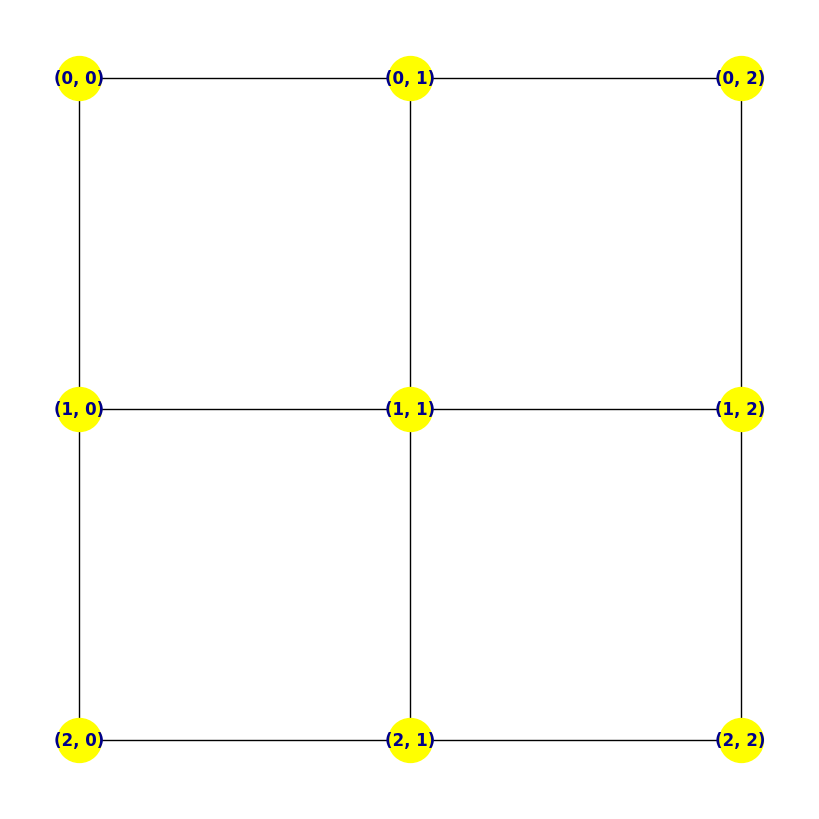

In [267]:
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import interact
class ImplicitGraph:
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
    def is_valid_cell(self, row, col):
        return 0 <= row < self.rows and 0 <= col < self.cols
    def neighbors(self, row, col):
        possible_neighbors = [(row-1, col), (row+1, col), (row, col-1), (row, col+1)]
        valid_neighbors = [(r, c) for r, c in possible_neighbors if self.is_valid_cell(r, c)]
        return valid_neighbors
def visualize_implicit_graph(rows, cols):
    graph = ImplicitGraph(rows, cols)
    G = nx.Graph()
    for r in range(rows):
        for c in range(cols):
            node = (r, c)
            G.add_node(node)
            neighbors = graph.neighbors(r, c)
            G.add_edges_from([(node, neighbor) for neighbor in neighbors])
    pos = {(r, c): (c, -r) for r in range(rows) for c in range(cols)}
    def plot_graph(k):
        plt.figure(figsize=(8, 8))
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='yellow', font_size=12, font_color='darkblue')
    interact(plot_graph, k=(0, 1, 0.1))
visualize_implicit_graph(3, 3)

**Implicit Treap**

In [269]:
import random
class Node:
    def __init__(self, key, priority):
        self.key = key
        self.priority = priority
        self.size = 1
        self.left = None
        self.right = None
def size(node):
    return node.size if node else 0
def update_size(node):
    if node:
        node.size = size(node.left) + size(node.right) + 1
def split(root, key):
    if not root:
        return None, None
    if key <= root.key:
        left, right = split(root.left, key)
        root.left = right
        update_size(root)
        return left, root
    else:
        left, right = split(root.right, key)
        root.right = left
        update_size(root)
        return root, right
def merge(left, right):
    if not left or not right:
        return left or right
    if left.priority > right.priority:
        left.right = merge(left.right, right)
        update_size(left)
        return left
    else:
        right.left = merge(left, right.left)
        update_size(right)
        return right
def insert(root, key):
    priority = random.randint(1, 10**9)
    new_node = Node(key, priority)
    left, right = split(root, key)
    return merge(merge(left, new_node), right)
def erase(root, key):
    left, right = split(root, key)
    left, _ = split(left, key - 1)
    return merge(left, right)
def kth_element(root, k):
    left_size = size(root.left) if root.left else 0
    if k == left_size + 1:
        return root.key
    elif k <= left_size:
        return kth_element(root.left, k)
    else:
        return kth_element(root.right, k - left_size - 1)
def inorder_traversal(node):
    if node:
        inorder_traversal(node.left)
        print(node.key, end=" ")
        inorder_traversal(node.right)
def preorder_traversal(node):
    if node:
        print(node.key, end=" ")
        preorder_traversal(node.left)
        preorder_traversal(node.right)
def postorder_traversal(node):
    if node:
        postorder_traversal(node.left)
        postorder_traversal(node.right)
        print(node.key, end=" ")
root = None
elements = [3, 1, 4, 1, 5, 9, 2, 6]
for element in elements:
    root = insert(root, element)
print("Inorder traversal:")
inorder_traversal(root)
print()
print("Preorder traversal:")
preorder_traversal(root)
print()
print("Postorder traversal:")
postorder_traversal(root)
print()
root = erase(root, 4)
print("Inorder traversal after erasing 4:")
inorder_traversal(root)
print()
root = erase(root, 2)
print("Preorder traversal after erasing 2:")
inorder_traversal(root)
print()
root = erase(root, 5)
print("Postorder traversal after erasing 5:")
inorder_traversal(root)
print()
third_element = kth_element(root, 3)
print("3rd element =", third_element)

Inorder traversal:
1 1 2 3 4 5 6 9 
Preorder traversal:
1 1 4 2 3 6 5 9 
Postorder traversal:
1 3 2 5 9 6 4 1 
Inorder traversal after erasing 4:
1 1 2 4 5 6 9 
Preorder traversal after erasing 2:
2 4 5 6 9 
Postorder traversal after erasing 5:
2 5 6 9 
3rd element = 6


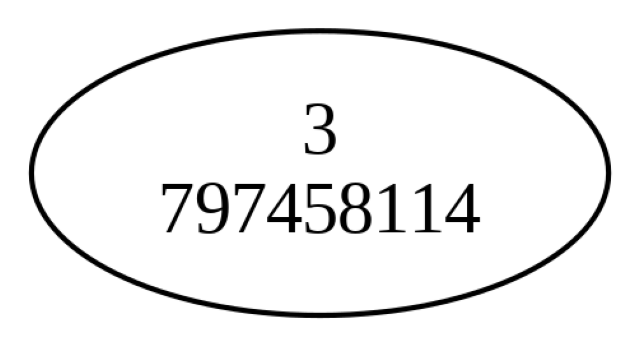

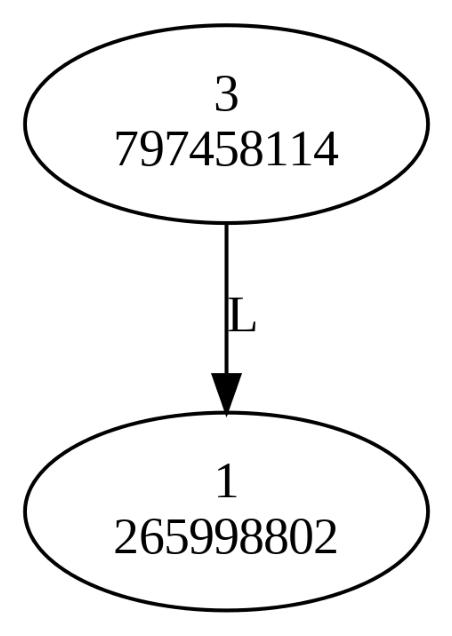

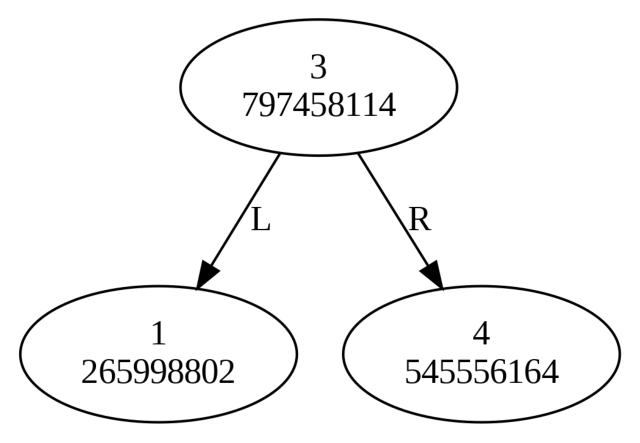

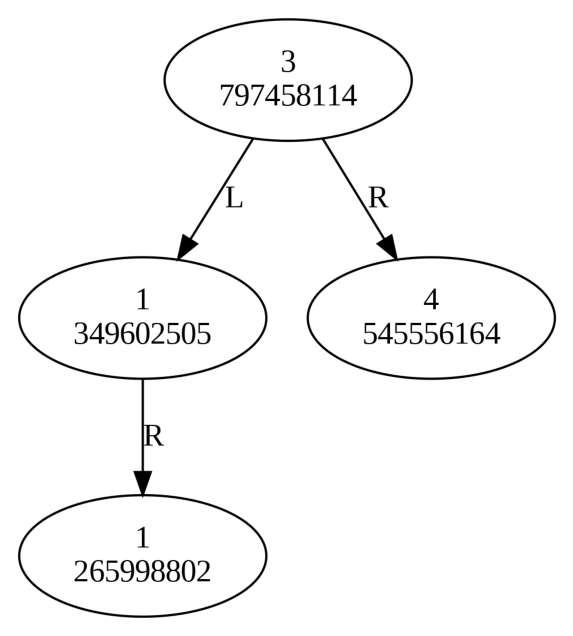

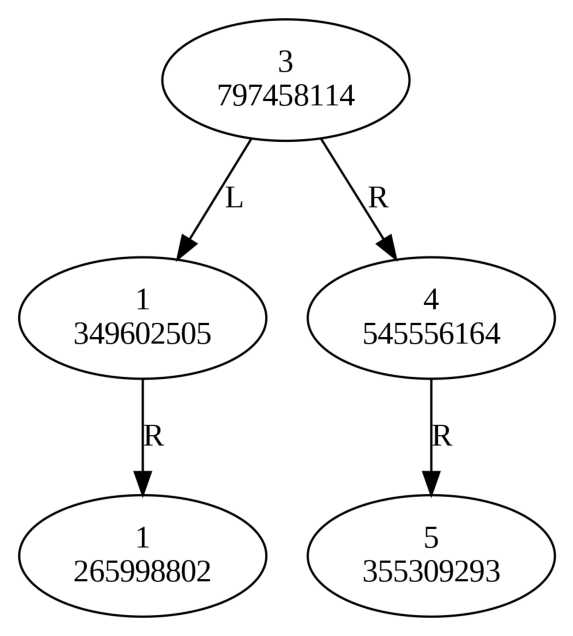

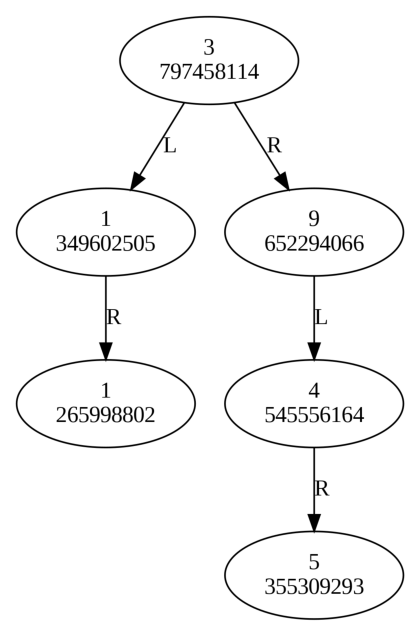

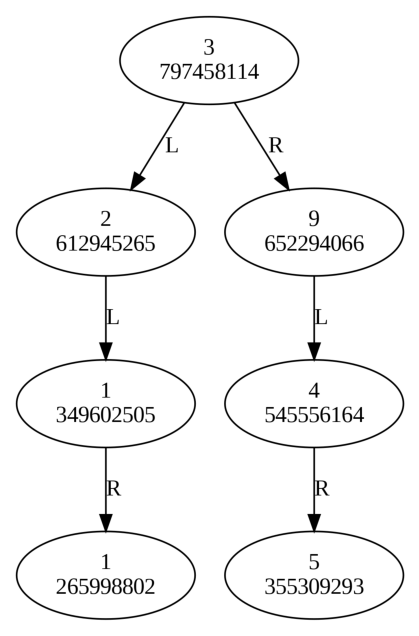

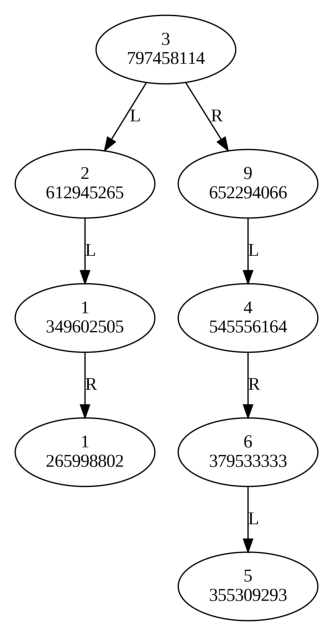

In [270]:
import matplotlib.pyplot as plt
import networkx as nx
from graphviz import Digraph
class Node:
    def __init__(self, key, priority):
        self.key = key
        self.priority = priority
        self.size = 1
        self.left = None
        self.right = None
def update_size(node):
    if node:
        node.size = size(node.left) + size(node.right) + 1
def size(node):
    return node.size if node else 0
def visualize_treap(node, graph, parent_name, side):
    if node:
        name = f"{node.key}_{node.priority}"
        graph.node(name, label=f"{node.key}\n{node.priority}")
        if parent_name:
            graph.edge(parent_name, name, constraint="true", label=side)
        visualize_treap(node.left, graph, name, "L")
        visualize_treap(node.right, graph, name, "R")
def visualize_implicit_treap(root):
    graph = Digraph(format="png")
    graph.attr(dpi="300")
    visualize_treap(root, graph, None, None)
    graph.render(filename="implicit_treap", directory="./", format="png", cleanup=True)
    image_path = "./implicit_treap.png"
    img = plt.imread(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
root = None
elements = [3, 1, 4, 1, 5, 9, 2, 6]
for element in elements:
    root = insert(root, element)
    visualize_implicit_treap(root)

**Interval Skip List**

In [272]:
import random
class Node:
    def __init__(self, start, end, level):
        self.start = start
        self.end = end
        self.level = level
        self.forward = [None] * (level + 1)
class IntervalSkipList:
    def __init__(self, max_levels):
        self.max_levels = max_levels
        self.header = self.create_node(float('-inf'), float('inf'), max_levels)
    def create_node(self, start, end, level):
        return Node(start, end, level)
    def random_level(self):
        level = 0
        while random.random() < 0.5 and level < self.max_levels:
            level += 1
        return level
    def insert(self, start, end):
        update = [None] * (self.max_levels + 1)
        current = self.header
        for i in range(self.header.level, -1, -1):
            while current.forward[i] and current.forward[i].start < start:
                current = current.forward[i]
            update[i] = current
        level = self.random_level()
        if level > self.header.level:
            for i in range(self.header.level + 1, level + 1):
                update[i] = self.header
            self.header.level = level
        new_node = self.create_node(start, end, level)
        for i in range(level + 1):
            new_node.forward[i] = update[i].forward[i]
            update[i].forward[i] = new_node
    def search(self, start, end):
        current = self.header
        for i in range(self.header.level, -1, -1):
            while current.forward[i] and current.forward[i].start < end:
                current = current.forward[i]
        current = current.forward[0]
        if current and current.start <= start and current.end >= end:
            return True
        return False
    def display(self):
        for level in range(self.header.level + 1):
            print(f"Level {level}: ", end="")
            node = self.header.forward[level]
            while node:
                print(f"({node.start}, {node.end})", end=" -> ")
                node = node.forward[level]
            print("None")
interval_skip_list = IntervalSkipList(max_levels=4)
interval_skip_list.insert(1, 5)
interval_skip_list.insert(3, 8)
interval_skip_list.insert(6, 10)
interval_skip_list.insert(12, 15)
interval_skip_list.display()
print(interval_skip_list.search(4, 7))
print(interval_skip_list.search(9, 11))

Level 0: (1, 5) -> (3, 8) -> (6, 10) -> (12, 15) -> None
Level 1: (3, 8) -> None
Level 2: (3, 8) -> None
Level 3: None
Level 4: None
False
False


**Interval Tree**

In [279]:
class Interval:
    def __init__(self, start, end):
        self.start = start
        self.end = end
class IntervalTreeNode:
    def __init__(self, interval):
        self.interval = interval
        self.max_end = interval.end
        self.left = None
        self.right = None
def build_interval_tree(intervals):
    if not intervals:
        return None
    intervals.sort(key=lambda x: x.start)
    return build_interval_tree_helper(intervals, 0, len(intervals) - 1)
def build_interval_tree_helper(intervals, start, end):
    if start > end:
        return None
    mid = (start + end) // 2
    root = IntervalTreeNode(intervals[mid])
    root.left = build_interval_tree_helper(intervals, start, mid - 1)
    root.right = build_interval_tree_helper(intervals, mid + 1, end)
    if root.left:
        root.max_end = max(root.max_end, root.left.max_end)
    if root.right:
        root.max_end = max(root.max_end, root.right.max_end)
    return root
def search_interval_tree(root, interval):
    if not root:
        return None
    if (root.interval.start <= interval.end and root.interval.end >= interval.start):
        return root.interval
    if root.left and root.left.max_end >= interval.start:
        return search_interval_tree(root.left, interval)
    else:
        return search_interval_tree(root.right, interval)
intervals = [Interval(15, 20), Interval(10, 30), Interval(5, 12), Interval(25, 30)]
interval_tree = build_interval_tree(intervals)
query_interval = Interval(14, 16)
result = search_interval_tree(interval_tree, query_interval)
if result:
    print(f"Intersection found: [{result.start}, {result.end}]")
else:
    print("No intersection found.")

Intersection found: [10, 30]


**All Pair Shortest Path using Johnson Algorithm**

In [2]:
from typing import List
class Edge:
    def __init__(self, source, destination, weight):
        self.source = source
        self.destination = destination
        self.weight = weight
def add_edge(graph: List[List[Edge]], source, destination, weight):
    if source >= len(graph):
        graph.extend([] for _ in range(source - len(graph) + 1))
    graph[source].append(Edge(source, destination, weight))
def bellman_ford(graph: List[List[Edge]], h: List[int]) -> bool:
    V = len(graph)
    dist = [float('inf')] * V
    dist[0] = 0
    for _ in range(V - 1):
        for edges in graph:
            for edge in edges:
                if dist[edge.source] != float('inf') and dist[edge.source] + edge.weight < dist[edge.destination]:
                    dist[edge.destination] = dist[edge.source] + edge.weight
    for edges in graph:
        for edge in edges:
            if dist[edge.source] != float('inf') and dist[edge.source] + edge.weight < dist[edge.destination]:
                return False
    for i in range(V):
        h[i] = dist[i]
    return True
def dijkstra(graph: List[List[Edge]], source, h: List[int]) -> List[int]:
    V = len(graph)
    dist = [float('inf')] * V
    dist[source] = 0
    pq = [(0, source)]
    while pq:
        u_h, u = pq.pop(0)
        for edge in graph[u]:
            v = edge.destination
            weight = edge.weight + h[u] - h[v]
            if dist[u] != float('inf') and dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight
                pq.append((dist[v], v))
                pq.sort()
    for i in range(V):
        if dist[i] != float('inf'):
            dist[i] -= h[i]
    return dist
def johnsons_algorithm(graph: List[List[Edge]]) -> List[List[int]]:
    V = len(graph)
    for i in range(V):
        add_edge(graph, V, i, 0)
    h = [0] * (V + 1)
    if not bellman_ford(graph, h):
        print("Graph contains a negative-weight cycle. Johnson's Algorithm cannot be applied.")
        return []
    shortest_paths = []
    for i in range(V):
        dist = dijkstra(graph, i, h)
        shortest_paths.append(dist)
    return shortest_paths
if __name__ == "__main__":
    V, E = map(int, input("Enter the number of vertices and edges: ").split())
    graph = [[] for _ in range(V)]
    print("Enter the edges (source destination weight):")
    for _ in range(E):
        source, destination, weight = map(int, input().split())
        add_edge(graph, source, destination, weight)
    shortest_paths = johnsons_algorithm(graph)
    print("Shortest Paths:")
    for row in shortest_paths:
        print(row)

Enter the number of vertices and edges: 4 5
Enter the edges (source destination weight):
0 1 5
0 2 2
1 2 5
2 3 9
3 0 17
Shortest Paths:
[0, -5, -2, -11, inf]
[36, -5, 6, -3, inf]
[28, 23, -2, -11, inf]
[28, 23, 26, -11, inf]


**KD Tree**

In [4]:
import numpy as np
class Node:
    def __init__(self, point, left=None, right=None, axis=None):
        self.point = point
        self.left = left
        self.right = right
        self.axis = axis
def build_kd_tree(points, depth=0):
    if len(points) == 0:
        return None
    k = len(points[0])
    axis = depth % k
    points.sort(key=lambda x: x[axis])
    median = len(points) // 2
    return Node(
        point=points[median],
        left=build_kd_tree(points[:median], depth + 1),
        right=build_kd_tree(points[median + 1:], depth + 1),
        axis=axis
    )
def nearest_neighbor(root, target, depth=0, best=None):
    if root is None:
        return best
    k = len(target)
    axis = depth % k
    next_best = None
    next_branch = None
    if best is None or np.linalg.norm([root.point[axis] - target[axis] for axis in range(k)]) < np.linalg.norm([best.point[axis] - target[axis] for axis in range(k)]):
        next_best = root
    else:
        next_best = best
    if target[axis] < root.point[axis]:
        next_branch = root.left
    else:
        next_branch = root.right
    return nearest_neighbor(next_branch, target, depth + 1, next_best)
if __name__ == "__main__":
    points = [(2,3), (5,4), (9,6), (4,7), (8,1), (7,2)]
    kdtree = build_kd_tree(points)
    target_point = (9, 2)
    nearest = nearest_neighbor(kdtree, target_point)
    print(f"Points = {points}")
    print(f"KD Tree:")
    print(f"Nearest neighbor to {target_point} = {nearest.point}")

Points = [(2, 3), (4, 7), (5, 4), (7, 2), (8, 1), (9, 6)]
KD Tree:
Nearest neighbor to (9, 2) = (8, 1)


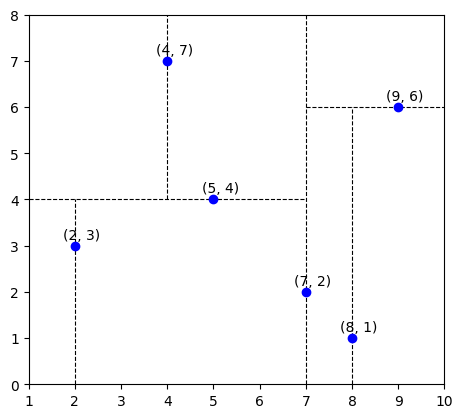

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
class Node:
    def __init__(self, point, left=None, right=None, axis=None):
        self.point = point
        self.left = left
        self.right = right
        self.axis = axis
def visualize_kd_tree(ax, node, x_range, y_range, depth=0):
    if node is not None:
        k = len(node.point)
        axis = depth % k
        if axis == 0:
            ax.plot([node.point[0], node.point[0]], [y_range[0], y_range[1]], color='black', linestyle='--', linewidth=0.8)
            visualize_kd_tree(ax, node.left, [x_range[0], node.point[0]], y_range, depth + 1)
            visualize_kd_tree(ax, node.right, [node.point[0], x_range[1]], y_range, depth + 1)
        else:
            ax.plot([x_range[0], x_range[1]], [node.point[1], node.point[1]], color='black', linestyle='--', linewidth=0.8)
            visualize_kd_tree(ax, node.left, x_range, [y_range[0], node.point[1]], depth + 1)
            visualize_kd_tree(ax, node.right, x_range, [node.point[1], y_range[1]], depth + 1)
        ax.plot(node.point[0], node.point[1], 'bo')
        ax.annotate(str(node.point), (node.point[0], node.point[1]), textcoords="offset points", xytext=(5,5), ha='center')
def plot_kd_tree(kdtree, x_range, y_range):
    fig, ax = plt.subplots()
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    visualize_kd_tree(ax, kdtree, x_range, y_range)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
if __name__ == "__main__":
    points = [(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)]
    kdtree = build_kd_tree(points)
    x_range = [min(p[0] for p in points) - 1, max(p[0] for p in points) + 1]
    y_range = [min(p[1] for p in points) - 1, max(p[1] for p in points) + 1]
    plot_kd_tree(kdtree, x_range, y_range)

In [8]:
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 32 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

In [9]:
!pip install pygraphviz

  Using cached pygraphviz-1.12.tar.gz (104 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.12-cp310-cp310-linux_x86_64.whl size=168132 sha256=3c7a0e7e57ebfeb3dd7452d1c11469337f69921f37d2edd4f81ca37ff1d6e9ad
  Stored in directory: /root/.cache/pip/wheels/1d/ee/b5/a2f54f9e9b3951599c05dcce270ca85e472f8e6cec470e397a
Successfully built pygraphviz


In [10]:
import pygraphviz as pgv
from PIL import Image
class Node:
    def __init__(self, point, left=None, right=None, axis=None):
        self.point = point
        self.left = left
        self.right = right
        self.axis = axis
def add_nodes(graph, node, parent_name='', depth=0):
    if node is not None:
        current_name = f"{node.point}_{depth}"
        graph.add_node(current_name, label=str(node.point))
        if parent_name:
            graph.add_edge(parent_name, current_name)
        add_nodes(graph, node.left, current_name, depth + 1)
        add_nodes(graph, node.right, current_name, depth + 1)
def visualize_kd_tree(kdtree):
    graph = pgv.AGraph(directed=True)
    graph.node_attr['shape'] = 'circle'
    add_nodes(graph, kdtree)
    graph_file_path = "kd_tree_graph.png"
    graph.draw(graph_file_path, format='png', prog='dot')
    img = Image.open(graph_file_path)
    img.show()
if __name__ == "__main__":
    points = [(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)]
    kdtree = build_kd_tree(points)
    visualize_kd_tree(kdtree)

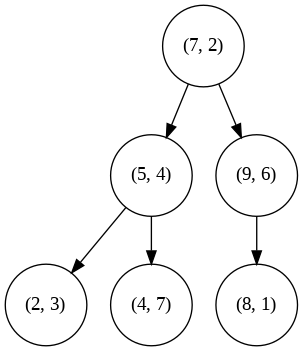

In [11]:
pip install networkx

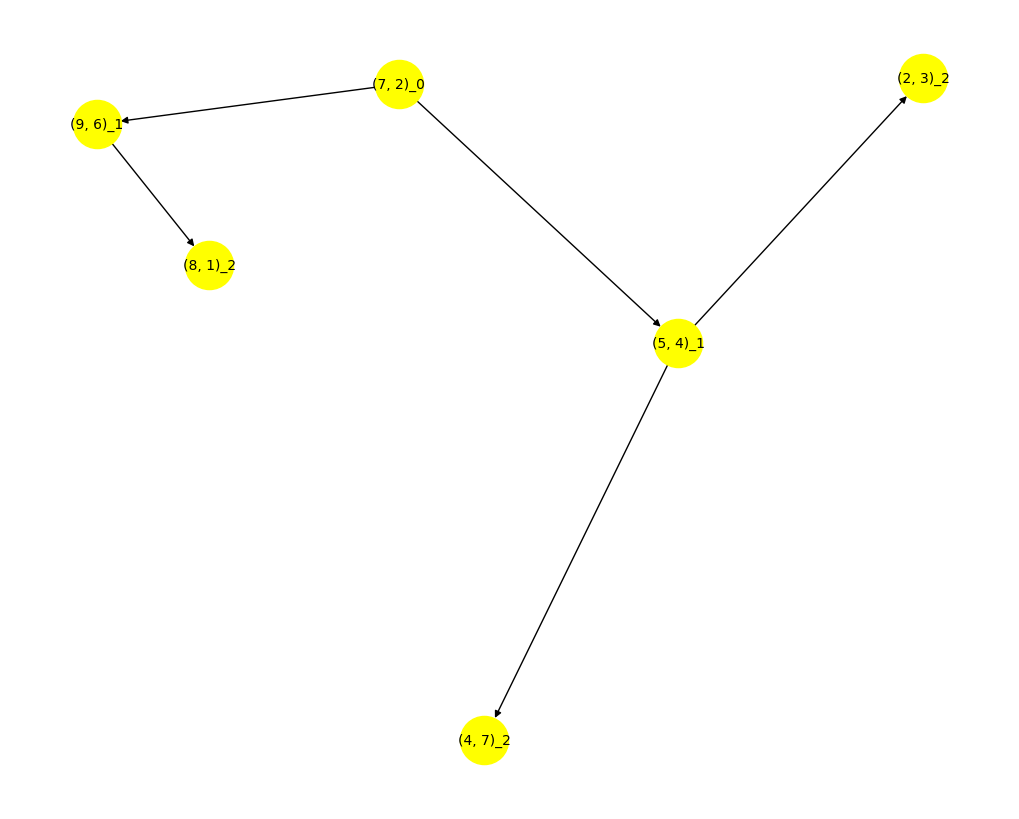

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
class Node:
    def __init__(self, point, left=None, right=None, axis=None):
        self.point = point
        self.left = left
        self.right = right
        self.axis = axis
def add_nodes(graph, node, parent_name='', depth=0):
    if node is not None:
        current_name = f"{node.point}_{depth}"
        graph.add_node(current_name, label=str(node.point))
        if parent_name:
            graph.add_edge(parent_name, current_name)
        add_nodes(graph, node.left, current_name, depth + 1)
        add_nodes(graph, node.right, current_name, depth + 1)
def visualize_kd_tree(kdtree):
    graph = nx.DiGraph()
    add_nodes(graph, kdtree)
    pos = nx.spring_layout(graph)
    labels = nx.get_edge_attributes(graph, 'label')
    plt.figure(figsize=(10, 8))
    nx.draw(graph, pos, with_labels=True, font_size=10, node_size=1200, node_color='yellow', font_color='black')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    plt.show()
if __name__ == "__main__":
    points = [(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)]
    kdtree = build_kd_tree(points)
    visualize_kd_tree(kdtree)

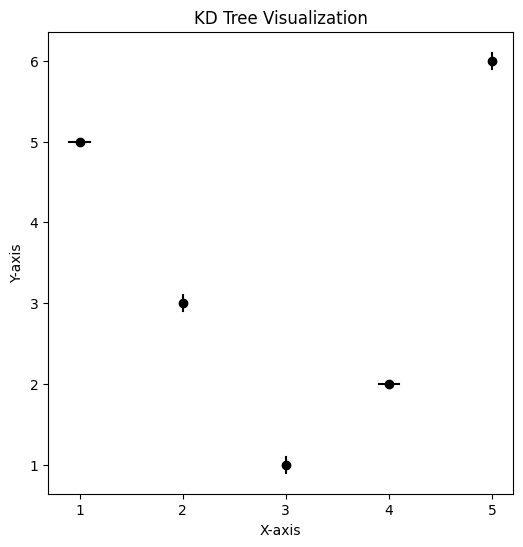

In [18]:
import matplotlib.pyplot as plt
import numpy as np
class Node:
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right
def visualize_kd_tree(node, axis, depth=0):
    if node is not None:
        axis = axis % len(node.point)
        plt.scatter(node.point[0], node.point[1], color='black')
        if axis == 0:
            plt.plot([node.point[0], node.point[0]], [node.point[1] - 0.1, node.point[1] + 0.1], color='black')
        else:
            plt.plot([node.point[0] - 0.1, node.point[0] + 0.1], [node.point[1], node.point[1]], color='black')
        visualize_kd_tree(node.left, axis + 1, depth + 1)
        visualize_kd_tree(node.right, axis + 1, depth + 1)
root = Node(point=(2, 3))
root.left = Node(point=(1, 5))
root.right = Node(point=(4, 2))
root.left.left = Node(point=(3, 1))
root.left.right = Node(point=(5, 6))
plt.figure(figsize=(6, 6))
visualize_kd_tree(root, axis=0)
plt.title("KD Tree Visualization")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [19]:
pip install graphviz

In [20]:
import graphviz
class Node:
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right
def visualize_kd_tree(node, dot=None, parent=None, side=None):
    if dot is None:
        dot = graphviz.Digraph(comment='KD Tree')
    if node is not None:
        label = f'{node.point[0]}, {node.point[1]}'
        dot.node(label)
        if parent is not None:
            dot.edge(parent, label, label=side)
        visualize_kd_tree(node.left, dot, label, 'L')
        visualize_kd_tree(node.right, dot, label, 'R')
    return dot
root = Node(point=(2, 3))
root.left = Node(point=(1, 5))
root.right = Node(point=(4, 2))
root.left.left = Node(point=(3, 1))
root.left.right = Node(point=(5, 6))
dot = visualize_kd_tree(root)
dot.render("kd_tree", format="png", cleanup=True)

'kd_tree.png'

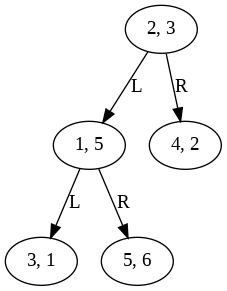

**Lazy Propagation Segment Tree**

In [28]:
class LazySegmentTree:
    def __init__(self, arr):
        self.n = len(arr)
        self.tree = [0] * (4 * self.n)
        self.lazy = [0] * (4 * self.n)
        self.build(arr, 1, 0, self.n - 1)
    def build(self, arr, node, start, end):
        if start == end:
            self.tree[node] = arr[start]
        else:
            mid = (start + end) // 2
            self.build(arr, 2 * node, start, mid)
            self.build(arr, 2 * node + 1, mid + 1, end)
            self.tree[node] = self.tree[2 * node] + self.tree[2 * node + 1]
    def update_range(self, node, start, end, left, right, value):
        if self.lazy[node] != 0:
            self.tree[node] += (end - start + 1) * self.lazy[node]
            if start != end:
                self.lazy[2 * node] += self.lazy[node]
                self.lazy[2 * node + 1] += self.lazy[node]
            self.lazy[node] = 0
        if start > end or start > right or end < left:
            return
        if start >= left and end <= right:
            self.tree[node] += (end - start + 1) * value
            if start != end:
                self.lazy[2 * node] += value
                self.lazy[2 * node + 1] += value
            return
        mid = (start + end) // 2
        self.update_range(2 * node, start, mid, left, right, value)
        self.update_range(2 * node + 1, mid + 1, end, left, right, value)
        self.tree[node] = self.tree[2 * node] + self.tree[2 * node + 1]
    def query_range(self, node, start, end, left, right):
        if self.lazy[node] != 0:
            self.tree[node] += (end - start + 1) * self.lazy[node]
            if start != end:
                self.lazy[2 * node] += self.lazy[node]
                self.lazy[2 * node + 1] += self.lazy[node]
            self.lazy[node] = 0
        if start > end or start > right or end < left:
            return 0
        if start >= left and end <= right:
            return self.tree[node]
        mid = (start + end) // 2
        left_sum = self.query_range(2 * node, start, mid, left, right)
        right_sum = self.query_range(2 * node + 1, mid + 1, end, left, right)
        return left_sum + right_sum
arr = [1, 3, 5, 7, 9, 11]
segment_tree = LazySegmentTree(arr)
segment_tree.update_range(1, 0, len(arr) - 1, 1, 4, 2)
result = segment_tree.query_range(1, 0, len(arr) - 1, 2, 5)
print("Query Result =", result)

Query Result = 38


In [39]:
import pygraphviz as pgv
class TreeNode:
    def __init__(self, value=None, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right
class LazySegmentTree:
    def __init__(self, arr):
        self.n = len(arr)
        self.root = self.build(arr, 0, self.n - 1)
    def build(self, arr, start, end):
        if start == end:
            return TreeNode(arr[start])
        mid = (start + end) // 2
        left_child = self.build(arr, start, mid)
        right_child = self.build(arr, mid + 1, end)
        return TreeNode(None, left_child, right_child)
    def visualize(self, node, graph, pos=None, x=0, y=0, layer=1):
        if pos is None:
            pos = {id(node): (x, y)}
        if node.left and node.left.value is not None:
            graph.add_edge(id(node), id(node.left))
            pos[id(node.left)] = (x - 2 ** (5 - layer), y - 1)
            self.visualize(node.left, graph, pos, x - 2 ** (5 - layer), y - 1, layer + 1)
        if node.right and node.right.value is not None:
            graph.add_edge(id(node), id(node.right))
            pos[id(node.right)] = (x + 2 ** (5 - layer), y - 1)
            self.visualize(node.right, graph, pos, x + 2 ** (5 - layer), y - 1, layer + 1)
arr = [1, 3, 5, 7, 9, 11]
segment_tree = LazySegmentTree(arr)
graph = pgv.AGraph(directed=True)
graph.add_node(id(segment_tree.root))
segment_tree.visualize(segment_tree.root, graph)
graph.layout(prog='dot')
graph.draw('lazy_segment_tree_viz.png')

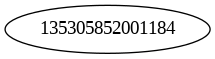

**Locality Sensitive Hashing**

In [45]:
import numpy as np
import random
class LocalitySensitiveHashing:
    def __init__(self, num_hash_functions, num_buckets, dimensionality):
        self.num_hash_functions = num_hash_functions
        self.num_buckets = num_buckets
        self.dimensionality = dimensionality
        self.hash_functions = [self.generate_hash_function() for _ in range(num_hash_functions)]
        self.hash_tables = [{} for _ in range(num_hash_functions)]
    def generate_hash_function(self):
        random_vector = np.random.randn(self.dimensionality)
        random_vector /= np.linalg.norm(random_vector)
        return random_vector
    def hash_vector(self, vector, hash_function):
        return tuple([int(np.dot(vector, hash_function) > 0)])
    def hash_data_point(self, data_point):
        return tuple(self.hash_vector(data_point, hash_function) for hash_function in self.hash_functions)
    def insert_data_point(self, data_point, point_id):
        for i, hash_table in enumerate(self.hash_tables):
            hash_key = self.hash_data_point(data_point)
            if hash_key not in hash_table:
                hash_table[hash_key] = [point_id]
            else:
                hash_table[hash_key].append(point_id)
    def query(self, query_point):
        results = set()
        for i, hash_table in enumerate(self.hash_tables):
            hash_key = self.hash_data_point(query_point)
            if hash_key in hash_table:
                results.update(hash_table[hash_key])
        return results
num_data_points = 100
dimensionality = 10
data_points = np.random.randn(num_data_points, dimensionality)
lsh = LocalitySensitiveHashing(num_hash_functions=5, num_buckets=10, dimensionality=dimensionality)
for i, data_point in enumerate(data_points):
    lsh.insert_data_point(data_point, i)
query_point = np.random.randn(dimensionality)
similar_points = lsh.query(query_point)
print(f"Query Points = {query_point}")
print(f"Similar Points = {similar_points}")

Query Points = [ 0.37665168  0.34158362  0.29951707 -1.11388132  0.75391961  0.37172751
 -0.24315262  0.91027663  1.22997026  1.89964741]
Similar Points = {26}


In [46]:
!pip install plotly

In [51]:
import numpy as np
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots
class LocalitySensitiveHashing:
    def __init__(self, num_hash_functions, num_buckets, dimensionality):
        self.num_hash_functions = num_hash_functions
        self.num_buckets = num_buckets
        self.dimensionality = dimensionality
        self.hash_functions = [self.generate_hash_function() for _ in range(num_hash_functions)]
        self.hash_tables = [{} for _ in range(num_hash_functions)]
    def generate_hash_function(self):
        random_vector = np.random.randn(self.dimensionality)
        random_vector /= np.linalg.norm(random_vector)
        return random_vector
    def hash_vector(self, vector, hash_function):
        return tuple([int(np.dot(vector, hash_function) > 0)])
    def hash_data_point(self, data_point):
        return tuple(self.hash_vector(data_point, hash_function) for hash_function in self.hash_functions)
    def insert_data_point(self, data_point, point_id):
        for i, hash_table in enumerate(self.hash_tables):
            hash_key = self.hash_data_point(data_point)
            if hash_key not in hash_table:
                hash_table[hash_key] = [point_id]
            else:
                hash_table[hash_key].append(point_id)
    def query(self, query_point):
        results = set()
        for i, hash_table in enumerate(self.hash_tables):
            hash_key = self.hash_data_point(query_point)
            if hash_key in hash_table:
                results.update(hash_table[hash_key])
        return results
num_data_points = 100
dimensionality = 2
data_points = np.random.randn(num_data_points, dimensionality)
lsh = LocalitySensitiveHashing(num_hash_functions=5, num_buckets=10, dimensionality=dimensionality)
for i, data_point in enumerate(data_points):
    lsh.insert_data_point(data_point, i)
def visualize_lsh(lsh, data_points):
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Data Points', 'Hash Tables'))
    fig.add_trace(go.Scatter(x=data_points[:, 0], y=data_points[:, 1], mode='markers', name='Data Points'),
                  row=1, col=1)
    for i, hash_table in enumerate(lsh.hash_tables):
        hash_keys = list(hash_table.keys())
        hash_points = np.array([np.array(key) for key in hash_keys])
        fig.add_trace(go.Scatter(x=hash_points[:, 0], y=hash_points[:, 1], mode='markers',
                                 marker=dict(size=8, color=i, colorscale='Viridis', symbol='cross'),
                                 name=f'Hash Table {i + 1}'),
                      row=1, col=2)
    fig.update_layout(title_text='VISUALIZATION OF LOCALITY SENSITIVE HASHING', showlegend=False)
    fig.show()
visualize_lsh(lsh, data_points)

**Min-Max Heap**

In [53]:
class MinMaxHeap:
    def __init__(self):
        self.heap = []
    def size(self):
        return len(self.heap)
    def is_empty(self):
        return len(self.heap) == 0
    def get_min(self):
        if self.is_empty():
            return None
        return self.heap[0]
    def get_max(self):
        if self.is_empty():
            return None
        return max(self.heap[1:])
    def insert(self, value):
        self.heap.append(value)
        self._heapify_up(len(self.heap) - 1)
    def extract_min(self):
        if self.is_empty():
            return None
        min_val = self.heap[0]
        last_val = self.heap.pop()
        if not self.is_empty():
            self.heap[0] = last_val
            self._heapify_down_min(0)
        return min_val
    def extract_max(self):
        if self.is_empty():
            return None
        max_val = max(self.heap[1:])
        max_index = self.heap.index(max_val)
        last_val = self.heap.pop()
        if not self.is_empty() and max_index < len(self.heap):
            self.heap[max_index] = last_val
            self._heapify_down_max(max_index)
        return max_val
    def _heapify_up(self, index):
        if index == 0:
            return
        parent_index = (index - 1) // 2
        if index % 2 == 0:
            if self.heap[index] > self.heap[parent_index]:
                self._swap(index, parent_index)
                self._heapify_up_max(parent_index)
            else:
                self._heapify_up_min(index)
        else:
            if self.heap[index] < self.heap[parent_index]:
                self._swap(index, parent_index)
                self._heapify_up_min(parent_index)
            else:
                self._heapify_up_max(index)
    def _heapify_up_min(self, index):
        grandparent_index = (index - 1) // 2
        if grandparent_index >= 0 and self.heap[index] < self.heap[grandparent_index]:
            self._swap(index, grandparent_index)
            self._heapify_up_min(grandparent_index)
    def _heapify_up_max(self, index):
        grandparent_index = (index - 1) // 2
        if grandparent_index >= 0 and self.heap[index] > self.heap[grandparent_index]:
            self._swap(index, grandparent_index)
            self._heapify_up_max(grandparent_index)
    def _heapify_down_min(self, index):
        left_child_index = 2 * index + 1
        right_child_index = 2 * index + 2
        min_index = index
        if left_child_index < len(self.heap) and self.heap[left_child_index] < self.heap[min_index]:
            min_index = left_child_index
        if right_child_index < len(self.heap) and self.heap[right_child_index] < self.heap[min_index]:
            min_index = right_child_index
        if min_index != index:
            self._swap(index, min_index)
            self._heapify_down_min(min_index)
    def _heapify_down_max(self, index):
        left_child_index = 2 * index + 1
        right_child_index = 2 * index + 2
        max_index = index
        if left_child_index < len(self.heap) and self.heap[left_child_index] > self.heap[max_index]:
            max_index = left_child_index
        if right_child_index < len(self.heap) and self.heap[right_child_index] > self.heap[max_index]:
            max_index = right_child_index
        if max_index != index:
            self._swap(index, max_index)
            self._heapify_down_max(max_index)
    def _swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
min_max_heap = MinMaxHeap()
min_max_heap.insert(3)
min_max_heap.insert(7)
min_max_heap.insert(2)
min_max_heap.insert(5)
min_max_heap.insert(1)
print("Min =", min_max_heap.get_min())
print("Max =", min_max_heap.get_max())
print("Extract Min =", min_max_heap.extract_min())
print("Extract Max =", min_max_heap.extract_max())
print("Min =", min_max_heap.get_min())
print("Max =", min_max_heap.get_max())

Min = 1
Max = 7
Extract Min = 1
Extract Max = 7
Min = 2
Max = 5


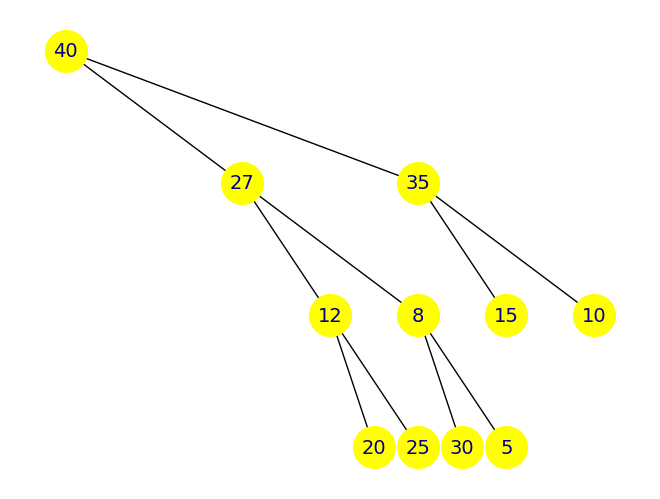

In [67]:
import networkx as nx
import matplotlib.pyplot as plt
class MinMaxHeapVisualizer:
    def visualize(self, min_max_heap):
        G = nx.Graph()
        self._build_graph(G, min_max_heap.heap, 0, 0)
        pos = {}
        for node in G.nodes(data=True):
            index, level = node[0], node[1]['level']
            pos[index] = (index * 2 ** (4 - level), -level)
        labels = {index: min_max_heap.heap[index] for index in G.nodes()}
        nx.draw(G, pos, with_labels=True, labels=labels, node_size=900, node_color='yellow', font_size=14,font_color='darkblue')
        plt.show()
    def _build_graph(self, G, heap, index, level):
        if index < len(heap):
            G.add_node(index, level=level)
            left_child = 2 * index + 1
            right_child = 2 * index + 2
            self._build_graph(G, heap, left_child, level + 1)
            self._build_graph(G, heap, right_child, level + 1)
            if left_child < len(heap):
                G.add_edge(index, left_child)
            if right_child < len(heap):
                G.add_edge(index, right_child)
min_max_heap = MinMaxHeap()
values_to_insert = [20, 15, 30, 10, 25, 35, 5, 12, 27, 40, 8]
for value in values_to_insert:
    min_max_heap.insert(value)
min_max_heap_visualizer = MinMaxHeapVisualizer()
min_max_heap_visualizer.visualize(min_max_heap)

In [68]:
pip install anytree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 2.3 MB/s eta 0:00:00


In [70]:
from anytree import Node, RenderTree, DoubleStyle
class MinMaxHeapNode(Node):
    def __init__(self, value, parent=None, children=None):
        super(MinMaxHeapNode, self).__init__(str(value), parent=parent, children=children)
        self.value = value
class MinMaxHeap:
    def __init__(self):
        self.root = None
    def insert(self, value):
        if self.root is None:
            self.root = MinMaxHeapNode(value)
        else:
            new_node = MinMaxHeapNode(value)
            self.insert_recursive(self.root, new_node, True)
    def insert_recursive(self, current_node, new_node, is_min_level):
        if current_node.value > new_node.value:
            current_node.value, new_node.value = new_node.value, current_node.value
        if not current_node.children:
            current_node.children = [new_node]
            new_node.parent = current_node
        else:
            if is_min_level:
                min_child = min(current_node.children, key=lambda x: x.value)
                self.insert_recursive(min_child, new_node, not is_min_level)
            else:
                max_child = max(current_node.children, key=lambda x: x.value)
                self.insert_recursive(max_child, new_node, not is_min_level)
min_max_heap = MinMaxHeap()
values_to_insert = [20, 15, 30, 10, 25, 35, 5, 12, 27, 40, 8]
for value in values_to_insert:
    min_max_heap.insert(value)
for pre, _, node in RenderTree(min_max_heap.root, style=DoubleStyle):
    print("%s%s" % (pre, node.name))

20
╚══ 15
    ╚══ 30
        ╚══ 10
            ╚══ 25
                ╚══ 35
                    ╚══ 5
                        ╚══ 12
                            ╚══ 27
                                ╚══ 40
                                    ╚══ 8


In [71]:
import plotly.graph_objects as go
from queue import SimpleQueue
class MinMaxHeap:
    def __init__(self):
        self.heap = []
    def insert(self, value):
        self.heap.append(value)
        self.heapify_up(len(self.heap) - 1)
    def heapify_up(self, index):
        while index > 0:
            parent = (index - 1) // 2
            if index % 2 == 0:
                if self.heap[index] > self.heap[parent]:
                    self.heap[index], self.heap[parent] = self.heap[parent], self.heap[index]
                else:
                    break
            else:
                if self.heap[index] < self.heap[parent]:
                    self.heap[index], self.heap[parent] = self.heap[parent], self.heap[index]
                else:
                    break
            index = parent
    def visualize(self):
        fig = go.Figure()
        queue = SimpleQueue()
        queue.put((0, 0, 0))
        while not queue.empty():
            level, pos, parent = queue.get()
            value = self.heap[pos] if pos < len(self.heap) else None
            fig.add_trace(go.Scatter(
                x=[parent, pos],
                y=[-level, -level],
                mode='lines+text',
                name=str(value),
                textposition='bottom center',
                textfont=dict(size=10),
                hoverinfo='text',
                text=str(value),
            ))
            if pos * 2 + 1 < len(self.heap):
                queue.put((level + 1, pos * 2 + 1, pos))
            if pos * 2 + 2 < len(self.heap):
                queue.put((level + 1, pos * 2 + 2, pos))
        fig.update_layout(
            showlegend=False,
            yaxis=dict(
                autorange='reversed',
                showgrid=False,
                zeroline=False,
                showline=False,
                showticklabels=False,
            )
        )
        fig.show()
min_max_heap = MinMaxHeap()
values_to_insert = [20, 15, 30, 10, 25, 35, 5, 12, 27, 40, 8]
for value in values_to_insert:
    min_max_heap.insert(value)
min_max_heap.visualize()

**Multiple String Matching**

In [78]:
from queue import Queue
class AhoCorasick:
    class TrieNode:
        def __init__(self):
            self.children = {}
            self.fail = None
            self.output = []
    def __init__(self):
        self.root = self.TrieNode()
        self.pattern_lengths = []
    def insert(self, pattern, pattern_index):
        node = self.root
        for ch in pattern:
            if ch not in node.children:
                node.children[ch] = self.TrieNode()
            node = node.children[ch]
        node.output.append(pattern_index)
        self.pattern_lengths.append(len(pattern))
    def build_failure_links(self):
        q = Queue()
        for child in self.root.children.values():
            child.fail = self.root
            q.put(child)
        while not q.empty():
            current = q.get()
            for ch, child in current.children.items():
                q.put(child)
                fail_link = current.fail
                while fail_link is not None and ch not in fail_link.children:
                    fail_link = fail_link.fail
                child.fail = fail_link.children[ch] if fail_link is not None else self.root
                child.output.extend(child.fail.output)
    def search(self, text):
        result = []
        current_state = self.root
        for i, ch in enumerate(text):
            while current_state is not None and ch not in current_state.children:
                current_state = current_state.fail
            if current_state is None:
                current_state = self.root
            else:
                current_state = current_state.children[ch]
                for index in current_state.output:
                    result.append(i - self.pattern_lengths[index] + 1)
        return result
if __name__ == "__main__":
    ac = AhoCorasick()
    num_patterns = int(input("Number of patterns = "))
    patterns = []
    for i in range(num_patterns):
        pattern = input(f"Pattern {i + 1} = ")
        ac.insert(pattern, i)
    ac.build_failure_links()
    text = input("Text = ")
    matches = ac.search(text)
    print("Pattern matches found at positions =", matches)

Number of patterns = 4
Pattern 1 = AB
Pattern 2 = BC
Pattern 3 = ABC
Pattern 4 = ABCD
Text = ABCDAABCDEFFABCDBCD
Pattern matches found at positions = [0, 0, 1, 0, 5, 5, 6, 5, 12, 12, 13, 12, 16]
